In [27]:
!pip install --upgrade sentencepiece

Looking in indexes: https://pypi.org/simple, http://100.97.64.150
     |████████████████████████████████| 1.1 MB 1.6 MB/s eta 0:00:01
  Attempting uninstall: sentencepiece
    Found existing installation: sentencepiece 0.1.4
    Uninstalling sentencepiece-0.1.4:
      Successfully uninstalled sentencepiece-0.1.4
You should consider upgrading via the '/private/home/qiantong/.conda/envs/fairseq-fp16-20200116/bin/python3 -m pip install --upgrade pip' command.


In [42]:
import os
import sentencepiece as spm

In [22]:
all_lists=[
'/checkpoint/jacobkahn/data/lists/librispeech/train-clean-100.lst',
'/checkpoint/jacobkahn/data/lists/librispeech/train-clean-360.lst',
'/checkpoint/jacobkahn/data/lists/librispeech/train-other-500.lst',
'/checkpoint/wav2letter/data/swbd_lists/noNL/switchboard.16khz.lst',
'/checkpoint/wav2letter/data/swbd_lists/noNL/fisher.16khz.lst',
'/checkpoint/wav2letter/data/commonvoice/lists/train.lst',
'/checkpoint/antares/datasets/wsj/lists/si284.lst',
'/checkpoint/wav2letter/data/tedlium/lists/train.lst',
]

lexicon = "/private/home/qiantong/wav2letter_experiments/256_GPU/letters+wsj.lex"

In [27]:
spelling = {}
with open(lexicon) as f:
    for line in f:
        sp = line.strip().split()
        spell = ''.join(sp[1:])
        spell = spell.replace('|', ' ')
        spelling[sp[0]] = spell.strip()

In [28]:
for k, v in spelling.items():
    print(k, '|', v)

i | i
you | you
and | and
the | the
to | to
a | a
know | know
that | that
yeah | yeah
it | it
of | of
like | like
in | in
they | they
so | so
it's | it's
but | but
um | um
uh | uh
have | have
is | is
was | was
just | just
don't | don't
oh | oh
that's | that's
think | think
do | do
right | right
i'm | i'm
my | my
for | for
what | what
we | we
or | or
well | well
on | on
not | not
be | be
really | really
if | if
are | are
mean | mean
with | with
about | about
there | there
all | all
people | people
get | get
this | this
one | one
would | would
ah | ah
at | at
because | because
mhm | mhm
no | no
he | he
when | when
out | out
then | then
go | go
as | as
me | me
up | up
they're | they're
can | can
had | had
lot | lot
how | how
okay | okay
now | now
good | good
from | from
some | some
your | your
time | time
them | them
something | something
going | going
more | more
too | too
got | got
kind | kind
uh-huh | uh huh
you're | you're
see | see
i've | i've
where | where
were | were
there's | ther

seemed | seemed
hasn't | hasn't
worst | worst
prefer | prefer
weight | weight
learned | learned
killed | killed
president | president
waiting | waiting
twice | twice
originally | originally
main | main
willing | willing
oil | oil
beach | beach
kill | kill
everywhere | everywhere
win | win
marriage | marriage
words | words
towards | towards
moving | moving
excuse | excuse
history | history
angeles | angeles
english | english
awful | awful
raise | raise
joke | joke
visit | visit
plan | plan
church | church
poor | poor
surprised | surprised
programs | programs
field | field
professional | professional
people's | people's
questions | questions
beginning | beginning
strike | strike
t. | t
signed | signed
bigger | bigger
dinner | dinner
boston | boston
follow | follow
players | players
biggest | biggest
known | known
p- | p
choose | choose
clean | clean
per | per
face | face
boys | boys
court | court
scared | scared
drinking | drinking
lately | lately
sign | sign
island | island
strong | str

direction | direction
concern | concern
spot | spot
liberal | liberal
bedroom | bedroom
river | river
humid | humid
michael | michael
beer | beer
dying | dying
senior | senior
japan | japan
grandchildren | grandchildren
nation | nation
block | block
effort | effort
participate | participate
kick | kick
district | district
mexican | mexican
directly | directly
depend | depend
band | band
pulled | pulled
flew | flew
hooked | hooked
realized | realized
traffic | traffic
bye-bye | bye bye
brings | brings
independent | independent
eighties | eighties
bachelor | bachelor
camp | camp
catholic | catholic
vegetables | vegetables
massachusetts | massachusetts
exposed | exposed
relate | relate
do- | do
orange | orange
diego | diego
thoughts | thoughts
famous | famous
limit | limit
material | material
cousins | cousins
target | target
farm | farm
arms | arms
gay | gay
seconds | seconds
covered | covered
russia | russia
hollywood | hollywood
immediately | immediately
commercial | commercial
letting

buddy | buddy
argue | argue
complaining | complaining
painting | painting
there're | there're
slowly | slowly
interview | interview
wheel | wheel
chocolate | chocolate
conditioning | conditioning
chemicals | chemicals
behavior | behavior
potential | potential
replace | replace
beliefs | beliefs
republican | republican
produce | produce
bronx | bronx
grad | grad
approach | approach
soap | soap
airplanes | airplanes
construction | construction
hits | hits
winning | winning
muslim | muslim
gifts | gifts
baltimore | baltimore
psychology | psychology
bu- | bu
greatest | greatest
reunion | reunion
sees | sees
conscious | conscious
queens | queens
maine | maine
constant | constant
women's | women's
depressed | depressed
swear | swear
cleveland | cleveland
orleans | orleans
aerobics | aerobics
fried | fried
hitting | hitting
year's | year's
circle | circle
bio | bio
proper | proper
matrix | matrix
badly | badly
native | native
emergency | emergency
mate | mate
memorial | memorial
summertime | 

discovered | discovered
sight | sight
museum | museum
heavily | heavily
element | element
therapy | therapy
removed | removed
protecting | protecting
dig | dig
capable | capable
lap | lap
deterrent | deterrent
travelled | travelled
soda | soda
kelly | kelly
recorded | recorded
may- | may
inch | inch
opera | opera
leads | leads
hates | hates
weekly | weekly
burned | burned
classrooms | classrooms
walls | walls
selfish | selfish
anniversary | anniversary
regime | regime
involvement | involvement
williams | williams
coke | coke
lovely | lovely
frustrated | frustrated
kevin | kevin
microsoft | microsoft
bull | bull
models | models
lowest | lowest
offices | offices
collecting | collecting
asia | asia
bits | bits
score | score
musician | musician
promote | promote
guessing | guessing
valuable | valuable
excessive | excessive
plate | plate
bikes | bikes
andrew | andrew
participating | participating
simpson | simpson
pursue | pursue
paycheck | paycheck
addiction | addiction
headed | headed
cen

hatred | hatred
chef | chef
cat's | cat's
miniature | miniature
ken | ken
boats | boats
salads | salads
refrigerator | refrigerator
microwave | microwave
n._b._c. | n b c
spray | spray
hotels | hotels
concerts | concerts
examples | examples
vulnerable | vulnerable
criteria | criteria
evidently | evidently
learnt | learnt
oakland | oakland
knit | knit
rescue | rescue
frank | frank
n._f._l. | n f l
humour | humour
humans | humans
aha | aha
advantages | advantages
cooks | cooks
attempt | attempt
mac | mac
remembered | remembered
toilet | toilet
ordinary | ordinary
marrying | marrying
contest | contest
tony | tony
c._i._a. | c i a
agencies | agencies
ruined | ruined
pl- | pl
reduce | reduce
musical | musical
detector | detector
pension | pension
must've | must've
exotic | exotic
consuming | consuming
requirement | requirement
tim | tim
discover | discover
laurie | laurie
festival | festival
climb | climb
championship | championship
berkeley | berkeley
company's | company's
democrats | demo

mow | mow
chief | chief
d._v._d.s | d v d s
consultant | consultant
institute | institute
contacts | contacts
represent | represent
russians | russians
lesser | lesser
scream | scream
ongoing | ongoing
relief | relief
pigs | pigs
shoulders | shoulders
refused | refused
folk | folk
c._b._s. | c b s
prize | prize
chill | chill
accustomed | accustomed
bitter | bitter
saddam's | saddam's
gear | gear
previously | previously
danny | danny
awards | awards
pouring | pouring
antique | antique
builds | builds
paradise | paradise
radical | radical
disappeared | disappeared
premise | premise
geography | geography
idiots | idiots
daytime | daytime
religiously | religiously
slash | slash
gu- | gu
brutal | brutal
laughs | laughs
stipulation | stipulation
banking | banking
tragic | tragic
they- | they
bankruptcy | bankruptcy
phillies | phillies
bitty | bitty
headline | headline
thomas | thomas
intentions | intentions
dayton | dayton
cricket | cricket
rode | rode
teen | teen
guidance | guidance
stolen 

colin | colin
filters | filters
mechanical | mechanical
considerably | considerably
ignored | ignored
packing | packing
permit | permit
stuff's | stuff's
perceived | perceived
hurricanes | hurricanes
brief | brief
hangs | hangs
venture | venture
pepsi | pepsi
busted | busted
fighter | fighter
conditioned | conditioned
dah | dah
separation | separation
dull | dull
aaron | aaron
lined | lined
motion | motion
comprehend | comprehend
barrel | barrel
snack | snack
panicking | panicking
crude | crude
offense | offense
companion | companion
profitable | profitable
cheated | cheated
cruz | cruz
joints | joints
funnier | funnier
carton | carton
diapers | diapers
no-one | no one
dinners | dinners
parochial | parochial
nemo | nemo
taping | taping
chinatown | chinatown
moderate | moderate
assigned | assigned
cigars | cigars
torture | torture
transition | transition
comp- | comp
drastically | drastically
brakes | brakes
diff- | diff
farms | farms
piss | piss
anything's | anything's
christianity | c

residential | residential
proposal | proposal
punish | punish
costa | costa
salem | salem
salon | salon
apt | apt
grasp | grasp
rational | rational
relaxation | relaxation
outer | outer
org | org
rink | rink
asians | asians
oaks | oaks
virgin | virgin
lion | lion
castle | castle
patrol | patrol
printer | printer
sherman | sherman
pornographic | pornographic
enforced | enforced
dell | dell
i._t. | i t
smallest | smallest
majored | majored
publish | publish
rapidly | rapidly
staring | staring
segment | segment
pers- | pers
rubber | rubber
railroad | railroad
peak | peak
whi- | whi
coal | coal
loads | loads
destructive | destructive
greens | greens
fate | fate
meaningful | meaningful
authors | authors
marching | marching
afterward | afterward
pasadena | pasadena
sentiment | sentiment
overwhelmed | overwhelmed
evolved | evolved
won- | won
bumper | bumper
permanently | permanently
impacted | impacted
essence | essence
hears | hears
dynamic | dynamic
incorrect | incorrect
professions | profe

sings | sings
mentor | mentor
lucked | lucked
expanded | expanded
rebecca | rebecca
grabbing | grabbing
confined | confined
dachshund | dachshund
ov- | ov
saturated | saturated
i._r._s. | i r s
slavery | slavery
kate | kate
matinee | matinee
peach | peach
derek | derek
douglas | douglas
meow | meow
ferret | ferret
mower | mower
cola | cola
relieve | relieve
pots | pots
ticks | ticks
cleans | cleans
turkish | turkish
fork | fork
louder | louder
showers | showers
is- | is
bicycles | bicycles
perspectives | perspectives
singles | singles
b | b
sledding | sledding
d._n._a. | d n a
rewards | rewards
altered | altered
m._c._i. | m c i
pharmaceutical | pharmaceutical
cherry | cherry
bouncing | bouncing
bullets | bullets
acceptance | acceptance
atomic | atomic
sensible | sensible
donations | donations
sweden | sweden
patrick's | patrick's
modeling | modeling
vinegar | vinegar
interest- | interest
hijacking | hijacking
slope | slope
warned | warned
tightened | tightened
surgeon | surgeon
psych 

resist | resist
hinder | hinder
bury | bury
embassy | embassy
representatives | representatives
differ | differ
restriction | restriction
gon- | gon
handguns | handguns
study's | study's
laboratory | laboratory
thats | thats
week's | week's
denominator | denominator
burner | burner
boo | boo
margin | margin
comforting | comforting
loo- | loo
season's | season's
overlook | overlook
dreamed | dreamed
petting | petting
q. | q
reimbursed | reimbursed
furthest | furthest
omaha | omaha
sponge | sponge
theirselves | theirselves
provo | provo
presently | presently
hypocritical | hypocritical
proposition | proposition
brother-in-law | brother in law
barney | barney
norfolk | norfolk
schnauzer | schnauzer
continuous | continuous
tasteful | tasteful
chil- | chil
outlets | outlets
strokes | strokes
phonics | phonics
witnessed | witnessed
programmed | programmed
brett | brett
cardinals | cardinals
niners | niners
symphony | symphony
mastercard | mastercard
relocate | relocate
satisfy | satisfy
arch

settings | settings
losers | losers
unbelievably | unbelievably
modest | modest
cartons | cartons
spirited | spirited
cockatiel | cockatiel
del | del
anita | anita
expired | expired
invisible | invisible
strapped | strapped
protects | protects
jeanette | jeanette
influx | influx
servers | servers
morale | morale
destroys | destroys
tania | tania
occurrence | occurrence
stooges | stooges
instilled | instilled
pitched | pitched
tales | tales
wired | wired
steer | steer
ministry | ministry
coma | coma
cabins | cabins
prisoner | prisoner
repaired | repaired
racy | racy
racially | racially
admissions | admissions
mandated | mandated
y._m._c._a. | y m c a
distracting | distracting
observed | observed
trucking | trucking
upenn | upenn
cooling | cooling
a._a. | a a
crock | crock
tails | tails
pistons | pistons
notre | notre
highland | highland
coaster | coaster
costner | costner
fooling | fooling
boston's | boston's
rec- | rec
pyramid | pyramid
malicious | malicious
evils | evils
thus | thus
j

ex-husband | ex husband
contagious | contagious
improv | improv
wrecked | wrecked
slides | slides
extraordinarily | extraordinarily
disparity | disparity
economist | economist
autistic | autistic
spreadsheets | spreadsheets
appealed | appealed
weaknesses | weaknesses
bagels | bagels
foundations | foundations
terminals | terminals
skier | skier
sled | sled
exploited | exploited
brandy | brandy
hea- | hea
stunned | stunned
winter's | winter's
desks | desks
regis | regis
strengthen | strengthen
r | r
bummed | bummed
wandered | wandered
climbed | climbed
highlight | highlight
toni | toni
stained | stained
edu- | edu
canton | canton
seniority | seniority
berry | berry
kirk | kirk
prosecutor | prosecutor
frivolous | frivolous
rate's | rate's
sixteenth | sixteenth
hilton | hilton
beard | beard
brittany | brittany
foreman | foreman
yourselves | yourselves
godfather | godfather
doggone | doggone
hanks | hanks
yellowstone | yellowstone
ram | ram
dow | dow
exploded | exploded
redneck | redneck
ro

intensity | intensity
journals | journals
latch | latch
spine | spine
marvin | marvin
astoria | astoria
satan | satan
broaden | broaden
polo | polo
na | na
scouting | scouting
rookie | rookie
nuggets | nuggets
freight | freight
insured | insured
trader | trader
darren | darren
nip | nip
compaq | compaq
corp | corp
unified | unified
plagiarism | plagiarism
students' | students'
worcester | worcester
clearer | clearer
den | den
maltese | maltese
fillet | fillet
auctions | auctions
heel | heel
yummy | yummy
seasoning | seasoning
greenhouse | greenhouse
yonkers | yonkers
genetics | genetics
reuben | reuben
brushing | brushing
premiums | premiums
chubby | chubby
underdog | underdog
houston's | houston's
putt | putt
earliest | earliest
gains | gains
evaluation | evaluation
canvas | canvas
(th-) | th
ashtrays | ashtrays
suppo- | suppo
pronounced | pronounced
dateline | dateline
uncalled | uncalled
overturned | overturned
cravings | cravings
kosher | kosher
calcium | calcium
psychologists | ps

prof- | prof
petted | petted
tonya | tonya
pm | pm
predicament | predicament
serena | serena
hoop | hoop
tackled | tackled
couches | couches
necklace | necklace
berlin | berlin
raking | raking
washes | washes
plaster | plaster
disposition | disposition
cherish | cherish
savior | savior
latex | latex
fractions | fractions
executions | executions
veto | veto
p._o._w.s | p o w s
sleeves | sleeves
renew | renew
scorpio | scorpio
adage | adage
titanic | titanic
browse | browse
quo | quo
tex | tex
arbitrarily | arbitrarily
individual's | individual's
doomed | doomed
racks | racks
clarion | clarion
crunches | crunches
macy's | macy's
sailboat | sailboat
definit- | definit
marlene | marlene
kung | kung
admirable | admirable
generating | generating
sosa | sosa
dianne | dianne
retreat | retreat
miscellaneous | miscellaneous
distributor | distributor
timeframe | timeframe
hank | hank
manually | manually
e-mail | e mail
receptive | receptive
penguins | penguins
doughnuts | doughnuts
veronica | ver

endanger | endanger
jerseys | jerseys
enacted | enacted
speller | speller
beagles | beagles
yous | yous
drains | drains
prosecutors | prosecutors
governor's | governor's
forte | forte
cap- | cap
pur- | pur
laden's | laden's
subsidizing | subsidizing
shattered | shattered
heartland | heartland
somalia | somalia
technicians | technicians
gerry | gerry
licensing | licensing
sideline | sideline
olympia | olympia
webpage | webpage
packaged | packaged
veggies | veggies
beets | beets
byron | byron
grad- | grad
joanna | joanna
oxford | oxford
faking | faking
refuses | refuses
steroid | steroid
digs | digs
flare | flare
royalty | royalty
memorabilia | memorabilia
daughter-in-law | daughter in law
sunburn | sunburn
harness | harness
onset | onset
sting | sting
airfare | airfare
dimensional | dimensional
puberty | puberty
warrior | warrior
snotty | snotty
zoe | zoe
swamp | swamp
taker | taker
ale | ale
connotation | connotation
che- | che
desired | desired
smash | smash
plum | plum
diggers | digg

milton | milton
-nd | nd
liters | liters
broth | broth
-m | m
ethiopian | ethiopian
homogeneous | homogeneous
exaggerating | exaggerating
binge | binge
specializes | specializes
claustrophobic | claustrophobic
flabbergasted | flabbergasted
parody | parody
calendars | calendars
misplaced | misplaced
passages | passages
fantasize | fantasize
linguists | linguists
hun | hun
extending | extending
oberlin | oberlin
affiliation | affiliation
parkinson's | parkinson's
shingles | shingles
suite | suite
censor- | censor
unnatural | unnatural
casts | casts
getaway | getaway
generalizations | generalizations
defeating | defeating
deviate | deviate
bicker | bicker
eggplant | eggplant
faze | faze
awarded | awarded
pageant | pageant
advancing | advancing
hugely | hugely
memorized | memorized
negotiated | negotiated
rattling | rattling
critique | critique
happenings | happenings
clout | clout
coincidentally | coincidentally
frantic | frantic
presbyterian | presbyterian
bribe | bribe
advent | advent
j

plausible | plausible
waiver | waiver
extract | extract
inventions | inventions
eng- | eng
interrupts | interrupts
hunk | hunk
yarn | yarn
overview | overview
squeaky | squeaky
repressed | repressed
solves | solves
learners | learners
newlywed | newlywed
outreach | outreach
roasted | roasted
broom | broom
imagery | imagery
volumes | volumes
percentile | percentile
loudest | loudest
gown | gown
mechanically | mechanically
nutritionist | nutritionist
r._n. | r n
dehydrated | dehydrated
one'll | one'll
dur- | dur
attuned | attuned
dolores | dolores
depend- | depend
grapefruit | grapefruit
thelma | thelma
unsettled | unsettled
transactions | transactions
christy | christy
snow's | snow's
mist | mist
contestant | contestant
settles | settles
crunchy | crunchy
vicarious | vicarious
old-fashioned | old fashioned
egos | egos
pinecone | pinecone
non-smoking | non smoking
arrests | arrests
insisting | insisting
silverware | silverware
napkins | napkins
four- | four
vents | vents
combining | comb

historian | historian
freecell | freecell
roanoke | roanoke
felonies | felonies
oxide | oxide
motherboard | motherboard
loaning | loaning
barbies | barbies
printout | printout
wasp | wasp
bambi | bambi
cobalt | cobalt
corolla | corolla
cd-rom | cd rom
sedan | sedan
elm | elm
cadillacs | cadillacs
alternator | alternator
penney | penney
20/20 | twenty twenty
semiautomatic | semiautomatic
u._n._l._v. | u n l v
(u-) | u
coughed | coughed
lot- | lot
underage | underage
cappuccino | cappuccino
boy- | boy
reopened | reopened
gossipy | gossipy
insanely | insanely
aeroplane | aeroplane
rooming | rooming
cleanest | cleanest
mai- | mai
ozzie | ozzie
tribute | tribute
surgeons | surgeons
icing | icing
nicky | nicky
surfboard | surfboard
brokaw | brokaw
dismiss | dismiss
absol- | absol
concur | concur
voodoo | voodoo
lag | lag
semantics | semantics
issuing | issuing
where- | where
veg- | veg
detached | detached
genders | genders
dodging | dodging
foam | foam
inst- | inst
university's | university'

fabricating | fabricating
cyanide | cyanide
standstill | standstill
intrigues | intrigues
stockpiling | stockpiling
snowballs | snowballs
toge- | toge
hans | hans
fayetteville | fayetteville
armageddon | armageddon
festivities | festivities
pa | pa
artery | artery
junkies | junkies
pressuring | pressuring
suspecting | suspecting
frisky | frisky
lighthearted | lighthearted
cedric | cedric
sullivan | sullivan
praising | praising
landmarks | landmarks
rant | rant
blase | blase
ultimatum | ultimatum
foiled | foiled
isolationist | isolationist
freda | freda
middletown | middletown
barricades | barricades
pretense | pretense
chevron | chevron
startling | startling
acquitted | acquitted
condoning | condoning
haystack | haystack
postcards | postcards
jut | jut
hyde | hyde
exiled | exiled
loot | loot
menagerie | menagerie
mimi | mimi
elton | elton
story's | story's
commodities | commodities
filtration | filtration
speciality | speciality
bunches | bunches
steele | steele
incur | incur
exhibits 

purr | purr
grant's | grant's
pigmy | pigmy
spade | spade
feather | feather
rhodesian | rhodesian
apart- | apart
bedding | bedding
uncontrollable | uncontrollable
snapper | snapper
hiss | hiss
montclair | montclair
grit | grit
shortcomings | shortcomings
furnished | furnished
beholder | beholder
flourish | flourish
clinging | clinging
gemini | gemini
somerville | somerville
unf- | unf
career's | career's
idealist | idealist
trenches | trenches
trudy | trudy
minim- | minim
pai- | pai
union's | union's
appliance | appliance
that're | that're
latina | latina
puzzled | puzzled
wal | wal
partisan | partisan
priests | priests
subscriber | subscriber
transcript | transcript
encompassing | encompassing
imitation | imitation
marr | marr
epcot | epcot
pokes | pokes
gleason | gleason
conductor | conductor
hackett | hackett
wink | wink
o'brien | o'brien
stump | stump
chucky | chucky
farley | farley
clubbing | clubbing
bradshaw | bradshaw
corinne | corinne
topless | topless
acorn | acorn
rapists | 

want's | want's
pretext | pretext
wreath | wreath
echelons | echelons
postponing | postponing
unsuccessful | unsuccessful
comparisons | comparisons
kuwaitis | kuwaitis
paramedics | paramedics
colombo | colombo
erased | erased
voiced | voiced
persist | persist
twi- | twi
telegraph | telegraph
revolutions | revolutions
bonfire | bonfire
mumbling | mumbling
ramadan | ramadan
colonized | colonized
wherein | wherein
nece- | nece
hugo | hugo
caterer | caterer
cliched | cliched
skunks | skunks
tokens | tokens
drone | drone
terrifies | terrifies
marinated | marinated
pedigree | pedigree
framework | framework
infidels | infidels
lieberman | lieberman
ventures | ventures
examining | examining
somber | somber
shielded | shielded
rallied | rallied
gothic | gothic
aguilera | aguilera
weirdoes | weirdoes
ladin | ladin
brain's | brain's
reindeer | reindeer
director's | director's
domination | domination
meters | meters
travesty | travesty
woven | woven
cripple | cripple
toothless | toothless
caved | 

swipe | swipe
raquel | raquel
halves | halves
carry-on | carry on
squabble | squabble
background's | background's
robotics | robotics
outlooks | outlooks
matthews | matthews
lyndon | lyndon
indoorsy | indoorsy
schneider | schneider
revival | revival
revived | revived
nit | nit
justifying | justifying
coincidences | coincidences
sucky | sucky
mal | mal
cynicism | cynicism
recruitment | recruitment
embezzled | embezzled
rout | rout
arrives | arrives
outweighed | outweighed
ottoman | ottoman
wisconsin's | wisconsin's
remodelling | remodelling
stared | stared
renewing | renewing
nadia | nadia
width | width
sa | sa
miscommunication | miscommunication
tat | tat
tout | tout
knucklehead | knucklehead
affirm | affirm
spat | spat
zen | zen
trainable | trainable
inconsequential | inconsequential
nadine | nadine
quieted | quieted
hyatt | hyatt
disobedience | disobedience
set- | set
betterment | betterment
blackmail | blackmail
validated | validated
grander | grander
indicating | indicating
pacing 

scab | scab
nooks | nooks
ambushed | ambushed
s._a._g. | s a g
terri- | terri
expended | expended
toto | toto
leaded | leaded
sleigh | sleigh
refried | refried
kauai | kauai
brookline | brookline
maury | maury
tadpole | tadpole
bonaparte | bonaparte
narrowly | narrowly
appointees | appointees
appointee | appointee
croft | croft
pinochle | pinochle
masturbating | masturbating
wading | wading
jolie | jolie
koby | koby
loyola | loyola
abacus | abacus
dents | dents
minivans | minivans
gett- | gett
d.s | d s
winnebago | winnebago
wagons | wagons
winged | winged
craftsman | craftsman
u._c.s | u c s
carmella | carmella
m._c._a._s._t. | m c a s t
equalization | equalization
ja | ja
cello | cello
munising | munising
selenium | selenium
geriatrics | geriatrics
camry | camry
mayer | mayer
buster's | buster's
lionel | lionel
penal | penal
urkel | urkel
reusable | reusable
itemize | itemize
preapproved | preapproved
himmy | himmy
2 | two
dennison | dennison
nonexempt | nonexempt
tigon | tigon
caddo

reaganomics | reaganomics
thre- | thre
paralegals | paralegals
madagascar | madagascar
expires | expires
vir- | vir
linear | linear
b.'s | b 's
placements | placements
deferred | deferred
grounding | grounding
legislator | legislator
joneses | joneses
bestest | bestest
truer | truer
pelican | pelican
khakis | khakis
overhauled | overhauled
overshadowed | overshadowed
levick | levick
retaining | retaining
lorie | lorie
photocopy | photocopy
directory | directory
applicant | applicant
schoo- | schoo
cinemas | cinemas
dean's | dean's
peewee | peewee
copier | copier
usual- | usual
preset | preset
metaphor | metaphor
redemption | redemption
replant | replant
consoles | consoles
a._b._c.'s | a b c 's
bike's | bike's
electorate | electorate
bagdad | bagdad
mah | mah
blaze | blaze
slingo | slingo
grids | grids
latrobe | latrobe
brian's | brian's
clint's | clint's
treasurer | treasurer
coronas | coronas
yen | yen
sues | sues
walleye | walleye
dingy | dingy
shasta | shasta
downgrade | downgrade


dedicating | dedicating
cordoned | cordoned
neverending | neverending
quadruple | quadruple
cameo | cameo
do's | do's
furnishings | furnishings
pandora's | pandora's
temps | temps
foolishly | foolishly
ying | ying
alimony | alimony
huff | huff
shifty | shifty
underrated | underrated
stri- | stri
lineage | lineage
gratitude | gratitude
vul- | vul
cora | cora
graduations | graduations
ironed | ironed
disintegrated | disintegrated
hubs | hubs
siege | siege
ghettos | ghettos
reprehensible | reprehensible
strived | strived
wales | wales
miners | miners
ishmael | ishmael
barren | barren
militants | militants
meyers | meyers
wackos | wackos
ev | ev
gunfire | gunfire
footnote | footnote
authorize | authorize
justifies | justifies
adamantly | adamantly
donkeys | donkeys
practicality | practicality
squads | squads
nigerian | nigerian
cronkite | cronkite
saigon | saigon
warlords | warlords
jeffery | jeffery
dic- | dic
move- | move
carriages | carriages
richness | richness
inform- | inform
pales |

fuelled | fuelled
contented | contented
littl- | littl
rufus | rufus
kid'll | kid'll
nebulous | nebulous
ville | ville
pocatello | pocatello
bosley | bosley
burlingame | burlingame
dou- | dou
dwight | dwight
diesels | diesels
rainman | rainman
tarot | tarot
softly | softly
nappy | nappy
jurisdictions | jurisdictions
donnie | donnie
splashing | splashing
eighths | eighths
odwalla | odwalla
slurp | slurp
angelina | angelina
formidable | formidable
glances | glances
misdemeanors | misdemeanors
baltimore's | baltimore's
k._g._b. | k g b
assaults | assaults
nanotechnology | nanotechnology
agriculturally | agriculturally
domingo | domingo
underdeveloped | underdeveloped
pedestrian | pedestrian
ecologically | ecologically
fouled | fouled
nucleus | nucleus
redwoods | redwoods
payless | payless
namaskar | namaskar
folsom | folsom
teaneck | teaneck
miserables | miserables
movable | movable
szechuan | szechuan
shoney's | shoney's
buffalo's | buffalo's
chlamydia | chlamydia
greenwood | greenwood
s

yan | yan
a._l._c._o._a. | a l c o a
laughlin | laughlin
comple- | comple
slimmer | slimmer
hibachi | hibachi
bylabatry | bylabatry
collards | collards
profoundly | profoundly
wager | wager
conglomeration | conglomeration
ornamental | ornamental
occas- | occas
tuesday's | tuesday's
omelets | omelets
skewer | skewer
pablo's | pablo's
cacciatore | cacciatore
kitchen's | kitchen's
carnivores | carnivores
cambodian | cambodian
bleu | bleu
stromboli | stromboli
spiced | spiced
marsala | marsala
schlotzky's | schlotzky's
correlates | correlates
bakeries | bakeries
gravies | gravies
crocker | crocker
varicose | varicose
georgine's | georgine's
bab- | bab
sinusitis | sinusitis
enamel | enamel
velveeta | velveeta
cheeseburgers | cheeseburgers
hibernation | hibernation
beet | beet
proclaimed | proclaimed
roadside | roadside
zertec | zertec
texicana | texicana
doldrums | doldrums
oooh | oooh
quarantining | quarantining
sniffly | sniffly
ohi- | ohi
torso | torso
delicatessen | delicatessen
beatric

rectified | rectified
bainbridge | bainbridge
euless | euless
presentable | presentable
bowlers | bowlers
south- | south
lita | lita
funnest | funnest
helm | helm
friar | friar
mcneese | mcneese
gorillas | gorillas
panty | panty
sills | sills
delia | delia
dysplasia | dysplasia
winked | winked
lititz | lititz
samoyeds | samoyeds
winkle | winkle
nipples | nipples
expound | expound
mustangs | mustangs
hedgehogs | hedgehogs
schnoodle | schnoodle
betta | betta
mira | mira
pusher | pusher
bowsman | bowsman
gabriel's | gabriel's
gideon's | gideon's
smuggler | smuggler
furlough | furlough
breezed | breezed
dollar- | dollar
rutherford | rutherford
ringer | ringer
debtor | debtor
mainstay | mainstay
stonehenge | stonehenge
clarksdale | clarksdale
calligraphy | calligraphy
puritanical | puritanical
arden | arden
sodomy | sodomy
yoki | yoki
secede | secede
rhythms | rhythms
escrow | escrow
tearjerker | tearjerker
animatrix | animatrix
pfeiffer | pfeiffer
sequences | sequences
warlock | warlock
ea

keenly | keenly
nesters | nesters
nth | nth
housesitting | housesitting
nightmarish | nightmarish
unlivable | unlivable
traveler's | traveler's
nosedive | nosedive
rumored | rumored
reassess | reassess
riffraff | riffraff
polled | polled
mommies | mommies
bys | bys
rescuers | rescuers
mindlessly | mindlessly
stra- | stra
recalls | recalls
tasking | tasking
scien- | scien
concocted | concocted
grandchildren's | grandchildren's
newsy | newsy
trepidation | trepidation
geographics | geographics
indescribable | indescribable
unthinkable | unthinkable
bicyclist | bicyclist
dined | dined
arisen | arisen
unicef | unicef
circumspect | circumspect
superdome | superdome
unfounded | unfounded
subliminally | subliminally
flattened | flattened
al-qaeda | al qaeda
martinis | martinis
jar- | jar
idiot's | idiot's
protectionist | protectionist
greenland | greenland
reddy | reddy
assimilated | assimilated
n._y. | n y
suffocation | suffocation
weirdness | weirdness
hid- | hid
granite | granite
helplessne

zimmerman | zimmerman
niceness | niceness
feeling's | feeling's
c.s | c s
grindstone | grindstone
capital's | capital's
downgrading | downgrading
infertile | infertile
acadian | acadian
carburetors | carburetors
synonymous | synonymous
venturing | venturing
backpedaling | backpedaling
talkie | talkie
compensates | compensates
circulate | circulate
scrubbing | scrubbing
haines | haines
employers' | employers'
incrementally | incrementally
effort's | effort's
feasibly | feasibly
s._e._p._t._a. | s e p t a
irregular | irregular
f._e._m._a. | f e m a
p._x. | p x
framer | framer
divinity | divinity
dimed | dimed
ehrenreich | ehrenreich
befriending | befriending
mooching | mooching
fru- | fru
stagnate | stagnate
reductions | reductions
transferable | transferable
uninterested | uninterested
educat- | educat
welfare's | welfare's
unofficial | unofficial
reorganizing | reorganizing
impo- | impo
cush | cush
treading | treading
purs- | purs
calhoun | calhoun
hostesses | hostesses
gino | gino
ine

neve- | neve
bastrop | bastrop
bohemian | bohemian
chuckled | chuckled
cling | cling
neighb- | neighb
robles | robles
knead | knead
davey | davey
valenzuela | valenzuela
light- | light
sexed | sexed
mufflers | mufflers
toothpick | toothpick
monastic | monastic
reciprocity | reciprocity
codependency | codependency
thoroughbred | thoroughbred
dewormed | dewormed
erode | erode
suey | suey
splendens | splendens
malignant | malignant
counterpart | counterpart
hopeful- | hopeful
manifestation | manifestation
sykes | sykes
heavyset | heavyset
wiley | wiley
barrio | barrio
recitals | recitals
appraisals | appraisals
disbarred | disbarred
topanga | topanga
ted's | ted's
rica's | rica's
devorah | devorah
scandanavia | scandanavia
manuel | manuel
gables | gables
indiscriminate | indiscriminate
overs- | overs
scandinavia | scandinavia
thefts | thefts
suit- | suit
beha- | beha
accelerating | accelerating
dunking | dunking
muggings | muggings
dollywood | dollywood
midterm | midterm
woolf | woolf
fli

kahn | kahn
home-schooled | home schooled
lye | lye
shoelace | shoelace
datsuns | datsuns
hartfield | hartfield
hei- | hei
conger | conger
-r | r
justifiably | justifiably
dahl | dahl
cording | cording
pining | pining
editorialize | editorialize
fielded | fielded
maddison | maddison
m16 | m sixteen
padlocked | padlocked
conspiracies | conspiracies
e._f._l. | e f l
diaspora | diaspora
bt | bt
amazement | amazement
undetected | undetected
composite | composite
pick- | pick
applauding | applauding
illusions | illusions
tipsy | tipsy
finalists | finalists
depots | depots
idol's | idol's
super- | super
technolo- | technolo
armament | armament
foaming | foaming
liberty's | liberty's
thornton | thornton
intercepting | intercepting
overhearing | overhearing
somali | somali
inhalation | inhalation
allegiances | allegiances
decadent | decadent
sinful | sinful
-lutely | lutely
dissipates | dissipates
dystrophy | dystrophy
sco- | sco
nations' | nations'
megs | megs
invi- | invi
overstay | overstay

girlish | girlish
snatching | snatching
wors- | wors
visceral | visceral
dickinson | dickinson
jinks | jinks
virulent | virulent
lieutenants | lieutenants
miguel | miguel
surfboards | surfboards
vitale | vitale
embarassment | embarassment
mcenroe | mcenroe
cecelia | cecelia
barbarians | barbarians
unplug | unplug
espn | espn
s._b._n. | s b n
comer | comer
honor's | honor's
die-hard | die hard
attr- | attr
candlestick | candlestick
shelved | shelved
holliday | holliday
ripken | ripken
wiper | wiper
park- | park
grandfa- | grandfa
m._l._m.s | m l m s
speedways | speedways
f._o._x. | f o x
makin | makin
atlan- | atlan
janna | janna
rebroadcast | rebroadcast
effect- | effect
miffed | miffed
spanned | spanned
obs- | obs
analysing | analysing
rammed | rammed
bicyclers | bicyclers
wrest- | wrest
raptors | raptors
emu | emu
skateboarder | skateboarder
ecological | ecological
batter's | batter's
farmville | farmville
rarest | rarest
w._c._w. | w c w
crai- | crai
cubbies | cubbies
boehm | boehm


peterbilt | peterbilt
kenner | kenner
g._v. | g v
goethe | goethe
transition's | transition's
dvd | dvd
halogen | halogen
compilation | compilation
carpet's | carpet's
railroading | railroading
tanglewood | tanglewood
williamstown | williamstown
snips | snips
hairstylist | hairstylist
burberry | burberry
vuitton | vuitton
lyman | lyman
nelga | nelga
bacterium | bacterium
benzoate | benzoate
lotions | lotions
obj- | obj
stuns | stuns
itta | itta
complimenting | complimenting
bar's | bar's
pineapples | pineapples
getaways | getaways
myles | myles
ymca | ymca
nunda | nunda
envi- | envi
pleasanton | pleasanton
croppies | croppies
coots | coots
coot | coot
fascism | fascism
synthesizers | synthesizers
folders | folders
autos | autos
ballplayers | ballplayers
whacks | whacks
prepositions | prepositions
freshener | freshener
skateboarders | skateboarders
journaling | journaling
headings | headings
glues | glues
ebbs | ebbs
vehement | vehement
overage | overage
sprinter | sprinter
showcases | 

barbra | barbra
horsing | horsing
a._t._s. | a t s
alaska's | alaska's
crazily | crazily
p._d._f. | p d f
malini | malini
budgetary | budgetary
unin- | unin
atmospheres | atmospheres
enclaves | enclaves
i._e._p.s | i e p s
garlina | garlina
anyo- | anyo
galleria | galleria
piecing | piecing
filene's | filene's
arcola | arcola
rereading | rereading
appointing | appointing
uncreative | uncreative
mutants | mutants
scorsese | scorsese
francais | francais
effingham | effingham
ricci | ricci
raps | raps
burlingame's | burlingame's
manicures | manicures
mulan | mulan
c._g. | c g
krueger | krueger
variants | variants
newsman | newsman
indigestion | indigestion
cubeys | cubeys
triples | triples
portability | portability
latoya | latoya
playable | playable
jackpots | jackpots
wonderland | wonderland
inputting | inputting
andrew's | andrew's
mongering | mongering
unpasteurized | unpasteurized
jetta | jetta
zigzag | zigzag
cushioning | cushioning
haitians | haitians
outliving | outliving
compe- |

lifesavers | lifesavers
election's | election's
direc- | direc
william's | william's
flirty | flirty
fuselage | fuselage
chromatography | chromatography
fiddles | fiddles
inadequacy | inadequacy
layered | layered
checkerboards | checkerboards
lehigh | lehigh
islan- | islan
pauls | pauls
quay | quay
check-in | check in
n._d. | n d
patootie | patootie
concer- | concer
inducing | inducing
contagion | contagion
viscous | viscous
apparent- | apparent
wryly | wryly
p._i. | p i
scampering | scampering
frenetic | frenetic
easy- | easy
mistresses | mistresses
bala | bala
cynwyd | cynwyd
guangzhou | guangzhou
-essarily | essarily
dobbins | dobbins
payers' | payers'
proselytize | proselytize
predilection | predilection
ultraconservative | ultraconservative
anglicans | anglicans
analogous | analogous
syn- | syn
ammunitions | ammunitions
notifications | notifications
abstraction | abstraction
defrauding | defrauding
parented | parented
pioneered | pioneered
populist | populist
resou- | resou
cholms

adhered | adhered
gauntlet | gauntlet
brigitte | brigitte
ducked | ducked
horowitz | horowitz
sharon's | sharon's
fetching | fetching
lexas | lexas
recor- | recor
quaking | quaking
gillum | gillum
mcpherson | mcpherson
voided | voided
nickname's | nickname's
mankind's | mankind's
subjugate | subjugate
capes | capes
steves | steves
whimsyway | whimsyway
croix | croix
bookham | bookham
dupage | dupage
s._a._u. | s a u
jantzen | jantzen
pows | pows
alden | alden
trotting | trotting
pigheaded | pigheaded
depiction | depiction
nakedness | nakedness
hoochie | hoochie
workloads | workloads
definitel- | definitel
yassar | yassar
ruthlessly | ruthlessly
gadhafi | gadhafi
retaliatory | retaliatory
israel- | israel
suic- | suic
motiv- | motiv
regaining | regaining
stashing | stashing
dampened | dampened
crowned | crowned
ireland's | ireland's
americanize | americanize
undervalue | undervalue
indexes | indexes
generously | generously
silenced | silenced
impassioned | impassioned
mobaric | mobaric


charlesetta | charlesetta
-stead | stead
greatness | greatness
eller | eller
competitors' | competitors'
hosp- | hosp
assistants' | assistants'
agri- | agri
holiness | holiness
polacks | polacks
thyself | thyself
ukulele | ukulele
senility | senility
aquarians | aquarians
sunbathing | sunbathing
lay- | lay
consum- | consum
thinkin | thinkin
picnicking | picnicking
climatic | climatic
commemoration | commemoration
orgasms | orgasms
astrophysicist | astrophysicist
celtic's | celtic's
stalkers | stalkers
tobsha | tobsha
-hood | hood
boohooing | boohooing
stakeout | stakeout
afterall | afterall
sapped | sapped
charl | charl
ostriches | ostriches
compressors | compressors
topography | topography
nothi- | nothi
resounding | resounding
planks | planks
hooliganism | hooliganism
crumb | crumb
exciting's | exciting's
and-and | and and
cropper | cropper
wilkspur | wilkspur
blankly | blankly
this' | this'
bingles | bingles
plexiglas | plexiglas
gelding | gelding
negadelphia | negadelphia
iman | im

blackwell | blackwell
ashrams | ashrams
jea- | jea
waxes | waxes
tampax | tampax
maybelline | maybelline
notaries | notaries
perj- | perj
arsonist | arsonist
decorators | decorators
funtasia | funtasia
sess- | sess
hillard | hillard
rocksberry | rocksberry
takeouts | takeouts
him's | him's
ostracize | ostracize
jojo | jojo
mary-ann | mary ann
draperies | draperies
scuffed | scuffed
perjurers | perjurers
pleads | pleads
foreperson | foreperson
numerology | numerology
implicitly | implicitly
guillotine | guillotine
realfoot | realfoot
rastafarian | rastafarian
cecile | cecile
marvel- | marvel
conceptualized | conceptualized
erasing | erasing
necc- | necc
foreclosures | foreclosures
cosmetically | cosmetically
alteration | alteration
stylists | stylists
tans | tans
kewanee | kewanee
cobbler's | cobbler's
fastened | fastened
paycheck's | paycheck's
wrongdoing | wrongdoing
sinned | sinned
pitney | pitney
bowes | bowes
citiz- | citiz
company- | company
ballese | ballese
refunded | refunded
o

coa- | coa
overtures | overtures
clev- | clev
lor- | lor
abdicating | abdicating
dmitri | dmitri
rapping | rapping
porte | porte
knuckleheads | knuckleheads
proctors | proctors
decreed | decreed
-ive | ive
a._c._t.s | a c t s
eros | eros
calisi | calisi
taming | taming
indignation | indignation
sycophants | sycophants
hinted | hinted
defaulted | defaulted
intellectuals | intellectuals
ferrigno | ferrigno
fishburne | fishburne
hinduism | hinduism
pausing | pausing
delves | delves
enjoyments | enjoyments
watercraft | watercraft
nominees | nominees
testicular | testicular
ovaries | ovaries
marchmont | marchmont
chiseled | chiseled
riser | riser
pete- | pete
tediousness | tediousness
cona- | cona
discombobulated | discombobulated
literature's | literature's
tremble | tremble
harrowing | harrowing
indelible | indelible
inhumanity | inhumanity
chocked | chocked
lawyering | lawyering
rifts | rifts
admonitions | admonitions
satanism | satanism
goran | goran
lifestyle's | lifestyle's
substation

kaylene | kaylene
oopsy | oopsy
sear | sear
stinkers | stinkers
angelino | angelino
suburb- | suburb
paining | paining
chrisny | chrisny
monsanto | monsanto
cheeky | cheeky
witch's | witch's
interchanged | interchanged
polson | polson
bilking | bilking
bilked | bilked
noelle | noelle
debo | debo
cellulite | cellulite
filings | filings
nightcap | nightcap
gazillions | gazillions
stiffness | stiffness
peron | peron
tammie | tammie
jesuits | jesuits
corinna | corinna
sandborne | sandborne
hutchingson | hutchingson
at's | at's
polaroid | polaroid
greets | greets
peeks | peeks
investors' | investors'
depar- | depar
dishonor | dishonor
reconnecting | reconnecting
flocked | flocked
n.s | n s
schwinn | schwinn
skat- | skat
praises | praises
chehaa | chehaa
boating's | boating's
cogs | cogs
beautification | beautification
zoological | zoological
fawcett | fawcett
elevation's | elevation's
phonic | phonic
playland | playland
atypical | atypical
speedboats | speedboats
friendsh- | friendsh
crypto

falafels | falafels
chickpeas | chickpeas
g._y._n. | g y n
microwavable | microwavable
hankering | hankering
westbound | westbound
setauket | setauket
wafers | wafers
frequents | frequents
ruffage | ruffage
omelettes | omelettes
menu's | menu's
sawmill | sawmill
paulina | paulina
akea | akea
abnormality | abnormality
grover | grover
sparkley | sparkley
dim-sum | dim sum
pana | pana
-oy | oy
dorito | dorito
grainy | grainy
gristle | gristle
natalie's | natalie's
unisex | unisex
pard- | pard
saffron | saffron
kimchi | kimchi
po | po
jaylo | jaylo
oy- | oy
cow's | cow's
oktoberfest | oktoberfest
threesomes | threesomes
luckiest | luckiest
littletown | littletown
emerald's | emerald's
bams | bams
zanell | zanell
lewinsky's | lewinsky's
briscoe | briscoe
firemen's | firemen's
stree- | stree
exempted | exempted
baklava | baklava
lasagna's | lasagna's
olean | olean
homeo- | homeo
pizza'd | pizza'd
-body's | body's
roma's | roma's
wellbutrin | wellbutrin
has- | has
pips | pips
overcharge | ove

yan- | yan
eighty-eight | eighty eight
non-existent | non existent
nieve | nieve
demoted | demoted
wydner | wydner
they'r- | they'r
winner's | winner's
dominguez | dominguez
mammy | mammy
geppetto | geppetto
anti-establishment | anti establishment
freedman | freedman
one-fifty | one fifty
access-o-ride | access o ride
baba | baba
hooper | hooper
unlawful | unlawful
freehand | freehand
motorists | motorists
plasterer | plasterer
carbel | carbel
literal- | literal
rothschild | rothschild
resulting | resulting
debunking | debunking
standardised | standardised
histor- | histor
hardings | hardings
dibbled | dibbled
peeved | peeved
howe- | howe
cineplex's | cineplex's
amoeba | amoeba
gout | gout
tonsil | tonsil
demerol | demerol
bedbugs | bedbugs
coppola | coppola
yerba | yerba
plate's | plate's
pariah | pariah
greediest | greediest
ballad | ballad
ugliosis | ugliosis
colangelo | colangelo
companie- | companie
homelands | homelands
dragush | dragush
pasa | pasa
monotheism | monotheism
volley

dweeb | dweeb
ween- | ween
topi- | topi
-ted | ted
g._p._l. | g p l
principled | principled
embodiment | embodiment
geneticists | geneticists
musici- | musici
lyme's | lyme's
wose | wose
hime | hime
y._v. | y v
sass | sass
mumbles | mumbles
lap-top | lap top
lec- | lec
lexical | lexical
lexicography | lexicography
a._i._x. | a i x
mccowell | mccowell
publishings | publishings
mueno | mueno
dyin- | dyin
webcams | webcams
disinfectants | disinfectants
emot- | emot
claveen | claveen
inert | inert
pharma- | pharma
aborigine | aborigine
shaman | shaman
morren | morren
hallmates | hallmates
cross-disciplinary | cross disciplinary
invasiveness | invasiveness
sub-genre | sub genre
aggrandize | aggrandize
handyman's | handyman's
authoritate- | authoritate
check-ups | check ups
-it | it
glandular | glandular
youngish | youngish
socil- | socil
c._y._a. | c y a
marmara | marmara
trabzon | trabzon
w._d. | w d
nymphomaniac | nymphomaniac
frasier's | frasier's
-bly | bly
umlitz | umlitz
nighters | ni

mildish | mildish
re-send | re send
rhesa | rhesa
nama | nama
budgie | budgie
divergent | divergent
hopkinsville | hopkinsville
antabuse | antabuse
desecration | desecration
'em'll | 'em'll
fitzwilliam | fitzwilliam
hazer | hazer
non-impact | non impact
storman | storman
norwiego | norwiego
crusader | crusader
omen | omen
inaccurately | inaccurately
obis- | obis
gensville | gensville
tigi | tigi
lweiville | lweiville
pedums | pedums
floride | floride
aced | aced
t._e._c._h._o. | t e c h o
vietman | vietman
it-did | it did
remorseful | remorseful
equivocal | equivocal
terri-lyn | terri lyn
confidences | confidences
chatterboxes | chatterboxes
highshow | highshow
awash | awash
popularity's | popularity's
selector | selector
bois- | bois
artisans | artisans
ellenboro | ellenboro
overeater's | overeater's
mrs. | mrs
n-ah | n ah
desert's | desert's
threaten- | threaten
scruff | scruff
mcgruff | mcgruff
titi | titi
ciga- | ciga
raz | raz
watcher's | watcher's
amant | amant
innoce- | innoce
e

greenbo | greenbo
reun- | reun
fiercer | fiercer
rabbits' | rabbits'
assertively | assertively
anybodys | anybodys
golding | golding
rowling | rowling
angela's | angela's
rubin | rubin
rubin's | rubin's
hoffman's | hoffman's
tastier | tastier
goldi- | goldi
prudishness | prudishness
intolerably | intolerably
brigaman | brigaman
palmilla | palmilla
m._p._a._a. | m p a a
palotka | palotka
dirt's | dirt's
kaluakona | kaluakona
tarzans | tarzans
reassign | reassign
catting | catting
rosemary's | rosemary's
goldwing | goldwing
david- | david
dobs | dobs
a._i._b._t. | a i b t
exte- | exte
mystery-holic | mystery holic
guile | guile
amelia's | amelia's
n._a._s._a. | n a s a
tilk | tilk
krisha | krisha
evolutionism | evolutionism
sculpey | sculpey
diskowski | diskowski
shakur | shakur
sun-roof | sun roof
p._t._a.s | p t a s
clamored | clamored
unnerves | unnerves
okerry | okerry
toddle | toddle
classic- | classic
-tution | tution
sar | sar
long-run | long run
self-motivation | self motivation


bapping | bapping
meshing | meshing
fianc's | fianc's
dotting | dotting
abecker | abecker
feralita | feralita
o'bryan | o'bryan
o'bryans | o'bryans
dwyers | dwyers
lou-anne | lou anne
pre-cancerous | pre cancerous
cervix | cervix
b._s._s. | b s s
trak | trak
bornia | bornia
virgos | virgos
loosey | loosey
goosey | goosey
accord- | accord
non-religious | non religious
suppor- | suppor
individualization | individualization
g._r._e.s | g r e s
misuses | misuses
administrationary | administrationary
shel | shel
melda | melda
-volved | volved
fallings | fallings
straggler | straggler
suffix | suffix
lecturers | lecturers
scout's | scout's
huh- | huh
huntland | huntland
knac- | knac
spurder | spurder
membrane | membrane
handhelds | handhelds
sadistics | sadistics
cazar | cazar
frazer | frazer
dennyson | dennyson
tectoma | tectoma
suffixes | suffixes
w-we | w we
adaptively | adaptively
complicational | complicational
tremolo | tremolo
harmonizes | harmonizes
guitarists | guitarists
hopscotch 

apu- | apu
overate | overate
dough- | dough
maliciousness | maliciousness
contours | contours
piav | piav
exuding | exuding
impactfully | impactfully
rom- | rom
lamber | lamber
bergita | bergita
rascala | rascala
manhattany | manhattany
submerging | submerging
lymphoma | lymphoma
dad'd | dad'd
sharl | sharl
pimping | pimping
nigh | nigh
gosford | gosford
designates | designates
nar- | nar
potootie | potootie
highfalutin' | highfalutin'
hoochy | hoochy
wander- | wander
existential | existential
marlborough's | marlborough's
rico's | rico's
cheap- | cheap
millon- | millon
parci- | parci
disqualifier | disqualifier
embraces | embraces
classiest | classiest
nutritionists | nutritionists
tucks | tucks
snorted | snorted
honeymoons | honeymoons
presty | presty
antitoxin | antitoxin
sensationalization | sensationalization
baltergrin | baltergrin
bedside | bedside
globalize | globalize
condon | condon
entomologist | entomologist
rh | rh
regrow | regrow
normalize | normalize
prescreening | presc

bobcats | bobcats
yowling | yowling
collant | collant
gerardo | gerardo
nib- | nib
cuthbert | cuthbert
smurfie | smurfie
glue- | glue
roughhouses | roughhouses
boyer | boyer
ulmer | ulmer
mello- | mello
rears | rears
bedas | bedas
sleeker | sleeker
rummages | rummages
alena | alena
tonkenese | tonkenese
begetting | begetting
vishler | vishler
bedspreads | bedspreads
walberg | walberg
intermural | intermural
mollies | mollies
among- | among
domer- | domer
turt- | turt
halstead | halstead
paraprofessional | paraprofessional
knobbies | knobbies
refridge | refridge
seedless | seedless
nutramax | nutramax
harrisbrook | harrisbrook
hersh- | hersh
granton | granton
luger's | luger's
astina | astina
estrus | estrus
bedroomed | bedroomed
zytec | zytec
trop- | trop
machoism | machoism
wiemeranas | wiemeranas
wiemerana | wiemerana
p._a._w._s. | p a w s
desolated | desolated
piewhackit | piewhackit
verbose | verbose
neva | neva
straw's | straw's
ponytail | ponytail
leapt | leapt
exi- | exi
coscos 

dia | dia
restric- | restric
host- | host
ovi- | ovi
fonz | fonz
honeycutt | honeycutt
budged | budged
net's | net's
vulgary | vulgary
l._i._e. | l i e
moyer | moyer
negroes | negroes
-finitely | finitely
foxsworthy | foxsworthy
approvingly | approvingly
cruncher | cruncher
materialistical | materialistical
workfare | workfare
inf | inf
neesham | neesham
smoothness | smoothness
achille | achille
ethiopians | ethiopians
deflation | deflation
reinforcer | reinforcer
caricatured | caricatured
f._s._i. | f s i
hangups | hangups
bawamu | bawamu
hyadene | hyadene
reformist | reformist
hadethists | hadethists
cleave | cleave
canonize | canonize
archetype | archetype
paulos | paulos
analyzes | analyzes
limbaugh's | limbaugh's
loudmouth | loudmouth
unempl- | unempl
acrimonious | acrimonious
dodgy | dodgy
ortega | ortega
lipping | lipping
u._s._s._l. | u s s l
convo | convo
oyang | oyang
regale | regale
a._c._o. | a c o
corporatey | corporatey
delutes | delutes
uping | uping
verges | verges
vixe

alburns | alburns
michigans | michigans
non-related | non related
histopathology | histopathology
friendship-type | friendship type
-ore | ore
prius | prius
blundering | blundering
appreciably | appreciably
m._s._m._x. | m s m x
topically | topically
speculates | speculates
tube-like | tube like
cheat- | cheat
westlake | westlake
tilting | tilting
particlized | particlized
minwall | minwall
fluency | fluency
extenua- | extenua
shirlyn | shirlyn
becua- | becua
psyc- | psyc
non-taxable | non taxable
slogged | slogged
socioeconomical | socioeconomical
apish | apish
rooge | rooge
roose | roose
caveats | caveats
dramas- | dramas
sportster | sportster
dappling | dappling
solben | solben
subli- | subli
schemer | schemer
poma | poma
swanky | swanky
torrey | torrey
tella | tella
jamil | jamil
non-physical | non physical
daraclean | daraclean
constructiveness | constructiveness
disobedient | disobedient
carasol | carasol
bustering | bustering
understudying | understudying
peeble | peeble
artor |

applicators | applicators
colest- | colest
splenectomy | splenectomy
re-heal | re heal
speedwagon | speedwagon
softness | softness
messer | messer
signalled | signalled
goddamned | goddamned
marcellain | marcellain
partaken | partaken
hazmat | hazmat
anti-seizure | anti seizure
volleyballs | volleyballs
chaste | chaste
pre-nup | pre nup
pheromones | pheromones
herc- | herc
polygamists | polygamists
cardiovasc- | cardiovasc
panatela | panatela
repipe | repipe
affil- | affil
precept | precept
stick- | stick
energizing | energizing
undid | undid
lie- | lie
barbell | barbell
resuscitation | resuscitation
seden- | seden
rhett | rhett
vicissitudes | vicissitudes
lorraine's | lorraine's
incompatibleness | incompatibleness
walk'll | walk'll
mahoney | mahoney
corralled | corralled
carven's | carven's
s._w._r. | s w r
smitty | smitty
incubus | incubus
carris | carris
encumbrance | encumbrance
puppetry | puppetry
scifi | scifi
steiber | steiber
ys | ys
suburb's | suburb's
lasalle | lasalle
snacke

proh- | proh
pornograph- | pornograph
eroticism | eroticism
decontextualizing | decontextualizing
decontextualize | decontextualize
eurocentric | eurocentric
util- | util
hollings | hollings
questi- | questi
overpopulate | overpopulate
leath | leath
darkened | darkened
raun- | raun
diversity's | diversity's
tomball | tomball
mobley | mobley
o'connor's | o'connor's
g._p._a.s | g p a s
shetler | shetler
michelangelo's | michelangelo's
graceland's | graceland's
bila | bila
shef | shef
kegonomics | kegonomics
flamed | flamed
perma | perma
mior- | mior
e-everybody | e everybody
vanc- | vanc
hoyt | hoyt
reproductive | reproductive
bogs | bogs
philoso- | philoso
antisemitic | antisemitic
inner- | inner
crou- | crou
pixels | pixels
kajillions | kajillions
palma | palma
upstate's | upstate's
salinger | salinger
sintar | sintar
gratitic- | gratitic
gratuitously | gratuitously
satron | satron
rushdie | rushdie
haroun | haroun
hemlock | hemlock
lineups | lineups
dufuses | dufuses
coffeehouse | cof

abridge | abridge
g._o._p. | g o p
blah's | blah's
ao- | ao
condit | condit
plageri- | plageri
plager- | plager
meridia | meridia
dredging | dredging
willbegone | willbegone
blasts | blasts
participles | participles
manhandled | manhandled
yon- | yon
w._h._a._t. | w h a t
therefore's | therefore's
retaliates | retaliates
israeli- | israeli
abraham's | abraham's
hadley | hadley
albion | albion
probacall | probacall
hardl- | hardl
w._b._r._c. | w b r c
n._b._c.'s | n b c 's
widow's | widow's
modem's | modem's
web's | web's
w._m._u. | w m u
summarizations | summarizations
subscri- | subscri
audiologist | audiologist
negations | negations
lovo | lovo
obits | obits
cb- | cb
cultury | cultury
t._e._s. | t e s
tavares | tavares
eustis | eustis
oakalla | oakalla
r._o. | r o
talin | talin
hurric- | hurric
carjacked | carjacked
extinguishing | extinguishing
hearses | hearses
schoolgirls | schoolgirls
moffett | moffett
klinder | klinder
lorrianne | lorrianne
lorian | lorian
prostituted | prostitu

sheathed | sheathed
stowed | stowed
vendio | vendio
ticketless | ticketless
moka | moka
rinsed | rinsed
roughnecks | roughnecks
unkempt | unkempt
decid- | decid
longleaf | longleaf
interviewee | interviewee
connectedness | connectedness
define- | define
dress- | dress
veiled | veiled
elgrove | elgrove
gogamale | gogamale
u._s._p._a. | u s p a
vag- | vag
cordo | cordo
beep- | beep
ingeborg | ingeborg
europe- | europe
millages | millages
canaanites | canaanites
intermarrying | intermarrying
defunding | defunding
windex | windex
resolution's | resolution's
azkaban | azkaban
rhythmically | rhythmically
expelling | expelling
prospectors | prospectors
dubya | dubya
velocity | velocity
inversely | inversely
communiques | communiques
burtonberg | burtonberg
regotten | regotten
charman | charman
willeen | willeen
probationers | probationers
richter's | richter's
treed- | treed
mor | mor
tierney | tierney
yar | yar
chaperons | chaperons
differenter | differenter
h._g._h. | h g h
tranquilizer | t

relationship- | relationship
cockerpoo | cockerpoo
mothballs | mothballs
impersonate | impersonate
n._o._i._s._e. | n o i s e
tiptoeing | tiptoeing
conscientiousness | conscientiousness
orangey | orangey
kippy | kippy
brookland | brookland
willing- | willing
beggar | beggar
futons | futons
polara | polara
poky | poky
limbosi | limbosi
beady | beady
zowie | zowie
cass | cass
horatio's | horatio's
seabock | seabock
pokatoe | pokatoe
vet'll | vet'll
statuses | statuses
corey's | corey's
unicorn | unicorn
hutches | hutches
nickles | nickles
personhood | personhood
pure- | pure
beta's | beta's
pie- | pie
cleary | cleary
ramona's | ramona's
dorsal | dorsal
jo's | jo's
de-scent | de scent
schipperke | schipperke
tanish | tanish
purebredness | purebredness
galumph | galumph
tethers | tethers
tarsha | tarsha
chaz | chaz
stay's | stay's
cozar | cozar
horashio | horashio
blackie's | blackie's
calcified | calcified
minis | minis
epinephrine | epinephrine
drooler | drooler
groc- | groc
rebatta | re

dyne | dyne
hero- | hero
horriblest | horriblest
olderson | olderson
memoriam | memoriam
proudest | proudest
gleaming | gleaming
ashtanga | ashtanga
tacitos | tacitos
rhododendron | rhododendron
ritz- | ritz
angelinos | angelinos
respect- | respect
northeasterner | northeasterner
bren- | bren
-don | don
heifers | heifers
poshness | poshness
iran- | iran
'bo- | 'bo
goriest | goriest
counteragents | counteragents
boeings | boeings
bakerstown | bakerstown
trey | trey
guiliano | guiliano
raged | raged
burian | burian
burtianans | burtianans
depressurizing | depressurizing
restrict- | restrict
disneylands | disneylands
redeployed | redeployed
redeployment | redeployment
fanciful | fanciful
shira | shira
create- | create
cardiopulmonary | cardiopulmonary
foudeen | foudeen
miscount | miscount
shakiest | shakiest
sleeped | sleeped
levron | levron
access- | access
mainstays | mainstays
attractors | attractors
empa- | empa
dona | dona
deloris | deloris
-um | um
wack- | wack
rebook | rebook
placa

'lo | 'lo
fairing | fairing
om | om
neill | neill
-ever | ever
-exactly | exactly
avonson | avonson
guang | guang
guangzhou's | guangzhou's
-periences | periences
-irlfriend | irlfriend
griddle | griddle
highpoint | highpoint
digestives | digestives
frosties | frosties
clermont's | clermont's
romaine | romaine
alcamal | alcamal
caseworker | caseworker
nonworking | nonworking
thai's | thai's
peanuty | peanuty
devo | devo
michel | michel
basquiat | basquiat
kandinsky | kandinsky
expressionist | expressionist
micro-biology | micro biology
two-thousand | two thousand
architectures | architectures
genet- | genet
canape | canape
sine | sine
time-warp | time warp
raina | raina
yogurts | yogurts
yoghurts | yoghurts
leeches | leeches
-dult | dult
chihuhua | chihuhua
willower | willower
snackey | snackey
dori- | dori
varian | varian
winsaucket | winsaucket
palled | palled
quai- | quai
-sitter | sitter
ponderosa's | ponderosa's
gobson | gobson
half-sister | half sister
dullness | dullness
-cum | 

earpieces | earpieces
evolvement | evolvement
potemple | potemple
solider | solider
clementi | clementi
stargell | stargell
divisioned | divisioned
bryants | bryants
palestra | palestra
westfork | westfork
resigns | resigns
hughes' | hughes'
strove | strove
fistfights | fistfights
gutted | gutted
tagalog | tagalog
ringside | ringside
series' | series'
vernons | vernons
inters- | inters
whitcomb | whitcomb
riley's | riley's
vankowski | vankowski
macarter | macarter
ivanisevic | ivanisevic
champion's | champion's
connors | connors
exerc | exerc
territorially | territorially
baha | baha
freshers | freshers
deliri- | deliri
allergists | allergists
allopathic | allopathic
fireflies | fireflies
schizoid | schizoid
scratchers | scratchers
inhumanely | inhumanely
declaws | declaws
magnification | magnification
adul- | adul
many- | many
adamy | adamy
droff | droff
rattener | rattener
shoals | shoals
podges | podges
b._f._a. | b f a
schoolmate | schoolmate
acculturated | acculturated
baffling | 

activision | activision
game- | game
starseed's | starseed's
asus | asus
amd | amd
discworld | discworld
m._o._h. | m o h
zilog | zilog
a._g._p. | a g p
tucows | tucows
resolute- | resolute
coroners | coroners
entryways | entryways
u._c._r. | u c r
christoph- | christoph
capulet | capulet
bakance | bakance
holbrick | holbrick
norrich | norrich
splurging | splurging
spyware | spyware
paltalk | paltalk
second-class | second class
larengectomy | larengectomy
enta- | enta
cine | cine
vertigos | vertigos
hully | hully
busta | busta
decade's | decade's
gouges | gouges
lochland | lochland
havasu | havasu
pals' | pals'
nonchalantly | nonchalantly
nervy | nervy
walwise | walwise
bumptious | bumptious
vs | vs
pushi- | pushi
paratroopers | paratroopers
madu | madu
padu | padu
inextricably | inextricably
every's | every's
unknowing | unknowing
terrar- | terrar
wynini | wynini
ostenard | ostenard
cacti | cacti
viewmark | viewmark
lampooned | lampooned
acclimatize | acclimatize
abductees | abductees

wilmerton | wilmerton
squishing | squishing
squid- | squid
snowhill | snowhill
jonelle | jonelle
neely | neely
linkspoint | linkspoint
opth- | opth
ophthalmologists | ophthalmologists
exterminator's | exterminator's
aggravant | aggravant
merritt | merritt
d._b._q.s | d b q s
d._b._q. | d b q
costumer | costumer
soraya | soraya
smuggles | smuggles
coyo- | coyo
berk- | berk
lederman | lederman
marbly | marbly
brimming | brimming
sigo | sigo
hoppie | hoppie
concurring | concurring
highbrow | highbrow
kitt- | kitt
winn | winn
c._m._i._s. | c m i s
eighteens | eighteens
colpepper | colpepper
harnesses | harnesses
skying | skying
lancasham | lancasham
re-shoots | re shoots
sauntering | sauntering
newfoundlands | newfoundlands
gle- | gle
toolbox | toolbox
mom'll | mom'll
transformative | transformative
rog | rog
isolate- | isolate
assing | assing
wini- | wini
lob- | lob
miramisa | miramisa
samia | samia
gorg- | gorg
buel- | buel
destitution | destitution
devolve | devolve
mim- | mim
recommitt

re-did | re did
pekar | pekar
brabidge | brabidge
kozinsky's | kozinsky's
does'n- | does'n
inculturate | inculturate
utopias | utopias
y._a._r._d. | y a r d
practicalities | practicalities
theatricals | theatricals
tarrentino | tarrentino
transpat- | transpat
matchstick | matchstick
gunfighter | gunfighter
barris | barris
sensens- | sensens
looki- | looki
ayol | ayol
espressos | espressos
ucla | ucla
gamecube's | gamecube's
m._m._o._r._p._g.s | m m o r p g s
antecedent | antecedent
liss | liss
guys's | guys's
craft's | craft's
pleated | pleated
dalkeith | dalkeith
cahain | cahain
anybody- | anybody
slashings | slashings
englishes | englishes
studen- | studen
worksheet | worksheet
branchy | branchy
decentralized | decentralized
coasted | coasted
truants | truants
heartforms | heartforms
santabel | santabel
homoza | homoza
capacitors | capacitors
co-partner | co partner
uploads | uploads
co-ordinates | co ordinates
c._f._c._c. | c f c c
'quit | 'quit
easie- | easie
fifa | fifa
c._o._n. |

undue | undue
kiting | kiting
bangla- | bangla
bedroo- | bedroo
borger | borger
pillowy | pillowy
ogen | ogen
-tailed | tailed
compooter | compooter
senten- | senten
lasson | lasson
trifle | trifle
novak | novak
grovel | grovel
embargoed | embargoed
animosities | animosities
nationalisms | nationalisms
optimistically | optimistically
hornet | hornet
didn'- | didn'
roomie's | roomie's
thoroughness | thoroughness
cutout | cutout
kick- | kick
experimenters | experimenters
output's | output's
predict- | predict
manufacturers' | manufacturers'
bemerton | bemerton
storie- | storie
cobblers | cobblers
selectives | selectives
incumbency | incumbency
reel- | reel
invincib- | invincib
retroactively | retroactively
disposer | disposer
escapement | escapement
non-reusable | non reusable
journal's | journal's
mist- | mist
amaretta | amaretta
turgeon | turgeon
laroute | laroute
lamink | lamink
ottenheimer | ottenheimer
horning | horning
lewisburg | lewisburg
nissan's | nissan's
raters | raters
porsc

transcribes | transcribes
rita's | rita's
webelows | webelows
communercation | communercation
karate's | karate's
everyone- | everyone
firearm's | firearm's
rejoining | rejoining
analyzers | analyzers
precru | precru
deltoids | deltoids
jype | jype
pratted | pratted
naturalists | naturalists
clumpy | clumpy
nontoxic | nontoxic
incredib- | incredib
inflator | inflator
warranty's | warranty's
smelting | smelting
derailment | derailment
fill-up | fill up
aerosols | aerosols
chlorofluo- | chlorofluo
chloro- | chloro
chlorofluorocar- | chlorofluorocar
chlorofluorocarbons | chlorofluorocarbons
toxics | toxics
hollyhocks | hollyhocks
diatomaceous | diatomaceous
tais | tais
cayennes | cayennes
prodigious | prodigious
tilling | tilling
garth's | garth's
hammerstein's | hammerstein's
sondheim | sondheim
starlight | starlight
hugo's | hugo's
computrac | computrac
vocab- | vocab
guesstimate | guesstimate
salespers- | salespers
strea- | strea
peretti's | peretti's
archeologists | archeologists
krat

casks | casks
baksheesh | baksheesh
incen- | incen
esc- | esc
tues- | tues
invoked | invoked
shootin- | shootin
t._r._w. | t r w
vindictively | vindictively
disclaimerage | disclaimerage
privac- | privac
insufficiency | insufficiency
medicai- | medicai
tek- | tek
tektronix | tektronix
avia | avia
discussion's | discussion's
entex | entex
hallucinogen | hallucinogen
trests | trests
interven- | interven
barrios | barrios
schwartz- | schwartz
shortcoming | shortcoming
s._r._i. | s r i
obsessions | obsessions
marlo | marlo
nonmilitary | nonmilitary
aggress- | aggress
alumi- | alumi
defrays | defrays
dwindles | dwindles
fluffed | fluffed
heroized | heroized
speckling | speckling
cardboards | cardboards
frui- | frui
bott- | bott
plasticine | plasticine
gainful | gainful
biodegrade | biodegrade
danza | danza
hamlin's | hamlin's
twelve's | twelve's
controll- | controll
discussionary | discussionary
electrode | electrode
nonglossy | nonglossy
windowed | windowed
wegman's | wegman's
restorage | 

w._r. | w r
dirtyson | dirtyson
coherently | coherently
depositor | depositor
redressing | redressing
interminably | interminably
servicer | servicer
pre-everything | pre everything
bedpans | bedpans
richland's | richland's
intersects | intersects
massachusetters | massachusetters
pinstripes | pinstripes
gahouli | gahouli
discover's | discover's
u._s._r. | u s r
-sr | sr
staling | staling
dimpled | dimpled
usually's | usually's
wheelbarrows | wheelbarrows
candlesticks | candlesticks
cashless | cashless
spendable | spendable
outlaid | outlaid
intergovernmental | intergovernmental
inter-united | inter united
constitu- | constitu
civil's | civil's
bel-air | bel air
gaine- | gaine
omniscious | omniscious
omniscipotent | omniscipotent
impelled | impelled
celltrex | celltrex
extracts | extracts
intruded | intruded
surmised | surmised
nonsol- | nonsol
100 | hundred
7094 | seven o nine four
sela | sela
d._w._a. | d w a
a._r._e. | a r e
lister | lister
tillable | tillable
baha- | baha
stablest 

abidest | abidest
abideth | abideth
abidin | abidin
abidingly | abidingly
abie | abie
abiel | abiel
abies | abies
abiet | abiet
abigail's | abigail's
abigails | abigails
abihu | abihu
abiit | abiit
abijah | abijah
abijah's | abijah's
abil | abil
abimelech | abimelech
abinadab | abinadab
abingdon | abingdon
abingdon's | abingdon's
abinger | abinger
abinger's | abinger's
abiram | abiram
abishag | abishag
abishai | abishai
abit | abit
abitibi | abitibi
abits | abits
abjection | abjection
abjectly | abjectly
abjectness | abjectness
abjuration | abjuration
abjurations | abjurations
abjure | abjure
abjured | abjured
abjures | abjures
abjuring | abjuring
abla | abla
ablage | ablage
ablain | ablain
ablano | ablano
ablative | ablative
ablaze | ablaze
abled | abled
abler | abler
ablest | ablest
ablethorpe | ablethorpe
ablett | ablett
ablett's | ablett's
ablewhite | ablewhite
ablewhite's | ablewhite's
abli | abli
abloom | abloom
ablow | ablow
ablution | ablution
ablutions | ablutions
ably | ably


aeolus | aeolus
aeon | aeon
aeonian | aeonian
aeons | aeons
aepyornis | aepyornis
aepytus | aepytus
aequo | aequo
aequor | aequor
aequus | aequus
aer | aer
aera | aera
aerated | aerated
aerating | aerating
aeration | aeration
aere | aere
aerials | aerials
aerie | aerie
aeriform | aeriform
aeris | aeris
aerodrome | aerodrome
aerodromes | aerodromes
aerolite | aerolite
aerolites | aerolites
aeromotor | aeromotor
aeronaut | aeronaut
aeronaut's | aeronaut's
aeronautic | aeronautic
aeronautics | aeronautics
aeronauts | aeronauts
aeropher | aeropher
aeropile | aeropile
aeroplane's | aeroplane's
aeroplaning | aeroplaning
aerostat | aerostat
aerostation | aerostation
aerschot | aerschot
aerssens | aerssens
aert | aert
aery | aery
aes | aes
aescendune | aescendune
aeschines | aeschines
aeschylean | aeschylean
aeschylus | aeschylus
aesclipus | aesclipus
aesculapius | aesculapius
aesir | aesir
aeson | aeson
aesop | aesop
aesop's | aesop's
aesopus | aesopus
aesthete | aesthete
aesthetes | aesthete

albinos | albinos
albinus | albinus
albion's | albion's
albiona | albiona
albitte | albitte
albius | albius
albizzi | albizzi
albo | albo
albogasio | albogasio
alboin | alboin
alboni | alboni
alboraya | alboraya
albornoz | albornoz
alboufaki | alboufaki
albracca | albracca
albrecht | albrecht
albrecht's | albrecht's
albret | albret
albret's | albret's
albritton | albritton
albs | albs
albuera | albuera
albula | albula
albumblatt | albumblatt
albumen | albumen
albumin | albumin
albuminoids | albuminoids
albuminous | albuminous
albury | albury
albury's | albury's
alburys | alburys
albus | albus
alby | alby
albyn | albyn
alc | alc
alca | alca
alcade | alcade
alcador | alcador
alcaeus | alcaeus
alcahazar | alcahazar
alcaic | alcaic
alcaics | alcaics
alcaid | alcaid
alcaide | alcaide
alcala | alcala
alcalde | alcalde
alcalde's | alcalde's
alcaldes | alcaldes
alcan | alcan
alcander | alcander
alcando | alcando
alcanor | alcanor
alcantara | alcantara
alcantra | alcantra
alcar | alcar
alcatras

alvira | alvira
alvira's | alvira's
alvirah | alvirah
alvirah's | alvirah's
alviro | alviro
alviry | alviry
alvord | alvord
alvyn | alvyn
alwa | alwa
alwa's | alwa's
alwaies | alwaies
alwar | alwar
alwayes | alwayes
alwaysh | alwaysh
alwayth | alwayth
alwin | alwin
alwood | alwood
alworthy | alworthy
alwyn | alwyn
alwyn's | alwyn's
alwynne | alwynne
alwynne's | alwynne's
alwyth | alwyth
aly | aly
alyattes | alyattes
alymer | alymer
alyona | alyona
alyosha | alyosha
alyosha's | alyosha's
alyoshka | alyoshka
alypius | alypius
alyre | alyre
alys | alys
alzire | alzire
alzo | alzo
alzugaray | alzugaray
am'rous | am'rous
am'zon | am'zon
ama | ama
amabel | amabel
amabel's | amabel's
amabilis | amabilis
amable | amable
amaboona | amaboona
amabuna | amabuna
amabutu | amabutu
amada | amada
amadan | amadan
amadas | amadas
amadeo | amadeo
amadi | amadi
amadieu | amadieu
amadis | amadis
amado | amado
amador | amador
amadour | amadour
amael | amael
amagansett | amagansett
amagay | amagay
amager | a

anhungered | anhungered
ani | ani
ani's | ani's
anibal | anibal
anibal's | anibal's
anice | anice
anice's | anice's
anicette | anicette
anicetus | anicetus
anichino | anichino
anicius | anicius
anie | anie
aniela | aniela
aniela's | aniela's
aniele | aniele
aniello | aniello
anigh | anigh
anikin | anikin
anile | anile
aniline | aniline
anim | anim
anima | anima
animadversion | animadversion
animadversions | animadversions
animadvert | animadvert
animadverted | animadverted
animadverting | animadverting
animae | animae
animalcula | animalcula
animalculae | animalculae
animalcule | animalcule
animalcules | animalcules
animale | animale
animali | animali
animalia | animalia
animalism | animalism
animality | animality
animalium | animalium
animalized | animalized
animam | animam
animas | animas
animatedly | animatedly
animates | animates
animating | animating
animaux | animaux
animi | animi
animile | animile
animiles | animiles
animis | animis
animism | animism
animistic | animistic
animo 

arbery | arbery
arbi | arbi
arbillot | arbillot
arbiter | arbiter
arbitral | arbitral
arbitrament | arbitrament
arbitrate | arbitrate
arbitrated | arbitrated
arbitrating | arbitrating
arbitrations | arbitrations
arbitrement | arbitrement
arbitress | arbitress
arbitrium | arbitrium
arblast | arblast
arblaster | arblaster
arbogad | arbogad
arbol | arbol
arborea | arborea
arboreal | arboreal
arbored | arbored
arborescent | arborescent
arboriculture | arboriculture
arbors | arbors
arborvitae | arborvitae
arbos | arbos
arbours | arbours
arbre | arbre
arbres | arbres
arbroath | arbroath
arbuckle's | arbuckle's
arbute | arbute
arbuthnot | arbuthnot
arbuthnot's | arbuthnot's
arbuthnots | arbuthnots
arbuton | arbuton
arbuton's | arbuton's
arbutus | arbutus
arc's | arc's
arca | arca
arcachon | arcachon
arcaded | arcaded
arcadia's | arcadia's
arcadians | arcadians
arcadias | arcadias
arcadius | arcadius
arcady | arcady
arcana | arcana
arcanum | arcanum
arcas | arcas
arcata | arcata
arce | arce
ar

artur | artur
arturo | arturo
artus | artus
arty's | arty's
artyom | artyom
artzibashef | artzibashef
aru | aru
arul | arul
arum | arum
arums | arums
arun | arun
arundale | arundale
arundel | arundel
arundel's | arundel's
arundell | arundell
arundels | arundels
arundo | arundo
aruns | aruns
arunta | arunta
aruru | aruru
aruwimi | aruwimi
arv | arv
arva | arva
arvad | arvad
arvanian | arvanian
arve | arve
arveiron | arveiron
arven | arven
arverne | arverne
arverni | arverni
arvernian | arvernian
arvid | arvid
arvie | arvie
arvilly | arvilly
arvilly's | arvilly's
arvina | arvina
arviragus | arviragus
arwenack | arwenack
arx | arx
ary | ary
arya | arya
aryks | aryks
arytenoid | arytenoid
arz | arz
arzachel | arzachel
as'd | as'd
as'll | as'll
as'm | as'm
as't | as't
asa | asa
asa's | asa's
asad | asad
asad's | asad's
asaf | asaf
asafetida | asafetida
asafoetida | asafoetida
asahel | asahel
asaki | asaki
asako | asako
asako's | asako's
asakusa | asakusa
asal | asal
asame | asame
asan | asa

aubigny | aubigny
aubin | aubin
aubin's | aubin's
aubourg | aubourg
aubrey's | aubrey's
aubreys | aubreys
aubrieux | aubrieux
aubry | aubry
aubusson | aubusson
aubyn | aubyn
aubyn's | aubyn's
aubyns | aubyns
aucas | aucas
aucassin | aucassin
auch | auch
auchenlochan | auchenlochan
auchester | auchester
auchinbreac | auchinbreac
auchincairn | auchincairn
auchincloss | auchincloss
auchincloss's | auchincloss's
auchinlech | auchinlech
auchinleck | auchinleck
auchmuty | auchmuty
aucht | aucht
auchtermuchty | auchtermuchty
auckland | auckland
auckland's | auckland's
auctioneer | auctioneer
auctioneer's | auctioneer's
auctioneering | auctioneering
auctor | auctor
auctore | auctore
auctoritas | auctoritas
auctoritate | auctoritate
aucun | aucun
aucune | aucune
aud | aud
auda | auda
audacious | audacious
audaciously | audaciously
audaciousness | audaciousness
audacities | audacities
audax | audax
aude | aude
audela | audela
audemard | audemard
audemer | audemer
audenried | audenried
audhumla |

baha'u'llah's | baha'u'llah's
bahadar | bahadar
bahader | bahader
bahadoor | bahadoor
bahadur | bahadur
bahadur's | bahadur's
bahaman | bahaman
bahari | bahari
bahawder | bahawder
bahee | bahee
bahgung | bahgung
bahi | bahi
bahima | bahima
bahira | bahira
bahji | bahji
bahloo | bahloo
bahman | bahman
bahnhof | bahnhof
bahram | bahram
bahrein | bahrein
bahri | bahri
bahs | bahs
bahss | bahss
bai | bai
bai's | bai's
baia | baia
baiae | baiae
baiardo | baiardo
baid | baid
baie | baie
baigadd | baigadd
baigne | baigne
baignoire | baignoire
baigol | baigol
baijal | baijal
baikal | baikal
baila | baila
bailable | bailable
baildon | baildon
baile | baile
bailee | bailee
bailie | bailie
bailie's | bailie's
bailies | bailies
bailiff's | bailiff's
bailiwicks | bailiwicks
baill | baill
baille | baille
baillet | baillet
bailleul | bailleul
bailli | bailli
baillie | baillie
baillie's | baillie's
baillies | baillies
baillot | baillot
bailly | bailly
bailment | bailment
bailos | bailos
baily | baily


barlcomb | barlcomb
barley's | barley's
barleycorn | barleycorn
barleycorn's | barleycorn's
barleyfield | barleyfield
barlight | barlight
barling | barling
barlingford | barlingford
barlow | barlow
barlow's | barlow's
barlowe | barlowe
barlowe's | barlowe's
barlows | barlows
barly | barly
barm | barm
barmaid | barmaid
barmaid's | barmaid's
barmaids | barmaids
barman | barman
barmberry | barmberry
barmby | barmby
barmby's | barmby's
barmbys | barmbys
barmecide | barmecide
barmen | barmen
barmesyde | barmesyde
barminster | barminster
barmont | barmont
barmouth | barmouth
barmston | barmston
barmy | barmy
barn's | barn's
barnabas | barnabas
barnabas's | barnabas's
barnabetta | barnabetta
barnabite | barnabite
barnabites | barnabites
barnabo | barnabo
barnaby | barnaby
barnaby's | barnaby's
barnacle | barnacle
barnacled | barnacled
barnacles | barnacles
barnard's | barnard's
barnardine | barnardine
barnardo | barnardo
barnardo's | barnardo's
barnards | barnards
barnato | barnato
barnave | 

bedaub | bedaub
bedaubed | bedaubed
bedawee | bedawee
bedaween | bedaween
bedawi | bedawi
bedawin | bedawin
bedazzlement | bedazzlement
bedazzling | bedazzling
bedchamber | bedchamber
bedchambers | bedchambers
bedclothes | bedclothes
bedclothing | bedclothing
bedd | bedd
bedded | bedded
bedder | bedder
beddgelert | beddgelert
beddin | beddin
beddingfield | beddingfield
beddington | beddington
beddoes | beddoes
beddou | beddou
beddow | beddow
beddy | beddy
bede | bede
bede's | bede's
bedeau | bedeau
bedeck | bedeck
bedeck'd | bedeck'd
bedecked | bedecked
bedecking | bedecking
bedecks | bedecks
bedeea | bedeea
bedel | bedel
bedelia | bedelia
bedell | bedell
beden | beden
beder | beder
bedes | bedes
bedesman | bedesman
bedesmen | bedesmen
bedevere | bedevere
bedevil | bedevil
bedeviled | bedeviled
bedeviling | bedeviling
bedevilled | bedevilled
bedevilment | bedevilment
bedew | bedew
bedew'd | bedew'd
bedewed | bedewed
bedewing | bedewing
bedews | bedews
bedfast | bedfast
bedfellow | bedf

benvenuto | benvenuto
benvolio | benvolio
benwell | benwell
benwell's | benwell's
benwick | benwick
benyon | benyon
benyon's | benyon's
benzeor | benzeor
benzeor's | benzeor's
benziger | benziger
benzine | benzine
benzoin | benzoin
benzol | benzol
benzoline | benzoline
benzon | benzon
beoples | beoples
beor | beor
beorminster | beorminster
beorn | beorn
beout | beout
beowulf's | beowulf's
bep | bep
bepi | bepi
beplastered | beplastered
beplumed | beplumed
beppa | beppa
beppino | beppino
beppo | beppo
beppo's | beppo's
bepraised | bepraised
bequeath | bequeath
bequeath'd | bequeath'd
bequeathe | bequeathe
bequeathed | bequeathed
bequeathes | bequeathes
bequeathing | bequeathing
bequeaths | bequeaths
bequests | bequests
ber | ber
bera | bera
berachah | berachah
beranger | beranger
beranger's | beranger's
berangere | berangere
berangere's | berangere's
berar | berar
berard | berard
berat | berat
berault | berault
berbalangs | berbalangs
berbel | berbel
berber's | berber's
berbera | berber

bideth | bideth
bidette | bidette
bidford | bidford
bidhata | bidhata
bidiane | bidiane
bidiane's | bidiane's
bidin | bidin
bidjie | bidjie
bidlake | bidlake
bidlake's | bidlake's
bidpai | bidpai
bidst | bidst
bidulph | bidulph
bidwell | bidwell
bidwell's | bidwell's
bie | bie
bieberstein | bieberstein
biedenbach | biedenbach
biederman | biederman
biek | biek
biel | biel
bielby | bielby
bield | bield
bieldy | bieldy
bielfeld | bielfeld
bielke | bielke
bielokonski | bielokonski
bielokurov | bielokurov
bielstein | bielstein
biencourt | biencourt
bienfaisance | bienfaisance
bienfaisante | bienfaisante
bienne | bienne
biennial | biennial
biennially | biennially
biennials | biennials
biens | biens
bienseance | bienseance
bienseances | bienseances
bientot | bientot
bienvenu | bienvenu
bienvenue | bienvenue
bienville | bienville
bier | bier
bierce | bierce
bierce's | bierce's
biere | biere
bierman | bierman
bierstadt | bierstadt
bies | bies
bievre | bievre
bif | bif
biff | biff
biff's | biff'

bleury | bleury
bleus | bleus
blevens | blevens
blevins | blevins
blewet | blewet
blewett | blewett
blewforth | blewforth
blewitt | blewitt
bleyer | bleyer
bleys | bleys
bli | bli
bli'me | bli'me
blick | blick
blick's | blick's
blickley | blickley
blicky | blicky
blid | blid
blidah | blidah
blieve | blieve
blifil | blifil
blifil's | blifil's
bliged | bliged
bligh's | bligh's
blight's | blight's
blighted | blighted
blighter | blighter
blighter's | blighter's
blighters | blighters
blighting | blighting
blights | blights
blighty | blighty
bligny | bligny
bliksem | bliksem
blimber | blimber
blimber's | blimber's
blime | blime
blimey | blimey
blimy | blimy
blin | blin
blindbeck | blindbeck
blinde | blinde
blinder's | blinder's
blindest | blindest
blindeth | blindeth
blindeye | blindeye
blindfolding | blindfolding
blindin | blindin
blindingly | blindingly
blindish | blindish
blindless | blindless
blindman | blindman
blindman's | blindman's
blindway | blindway
blink's | blink's
blinkdale | bl

bonnemain | bonnemain
bonner | bonner
bonner's | bonner's
bonners | bonners
bonnes | bonnes
bonnesdel | bonnesdel
bonnet's | bonnet's
bonneted | bonneted
bonnetless | bonnetless
bonneton | bonneton
bonnett | bonnett
bonnetta | bonnetta
bonneval | bonneval
bonneville's | bonneville's
bonnevilles | bonnevilles
bonney | bonney
bonneys | bonneys
bonnicastle | bonnicastle
bonnie's | bonnie's
bonniebell | bonniebell
bonnier | bonnier
bonnieres | bonnieres
bonniest | bonniest
bonnily | bonnily
bonnington | bonnington
bonnivard | bonnivard
bonnivard's | bonnivard's
bonnoeil | bonnoeil
bonnyboy | bonnyboy
bonnyboy's | bonnyboy's
bonnycastle | bonnycastle
bonnydale | bonnydale
bononia | bononia
bonorum | bonorum
bonos | bonos
bonover | bonover
bonpland | bonpland
bonsa | bonsa
bonsal | bonsal
bonsall | bonsall
bonsecours | bonsecours
bonser | bonser
bonsoir | bonsoir
bonsor | bonsor
bonstetten | bonstetten
bont | bont
bontarc | bontarc
bonte | bonte
bonte's | bonte's
bontebok | bontebok
bonteen 

bradleys | bradleys
bradly | bradly
bradmere | bradmere
bradmond | bradmond
brads | brads
bradshaws | bradshaws
bradstreet's | bradstreet's
bradstreets | bradstreets
bradwardine | bradwardine
bradwell | bradwell
brady's | brady's
bradys | bradys
brae | brae
braefield | braefield
braehead | braehead
braeland | braeland
braemar | braemar
braes | braes
braeside | braeside
braesig | braesig
braesig's | braesig's
brag's | brag's
braga | braga
bragadino | bragadino
braganza | braganza
bragdon | bragdon
bragdon's | bragdon's
brage | brage
bragelonne | bragelonne
bragg's | bragg's
braggadocio | braggadocio
braggadocios | braggadocios
braggart | braggart
braggart's | braggart's
braggarts | braggarts
bragge | bragge
bragger | bragger
braggin | braggin
bragh | bragh
bragi | bragi
bragin | bragin
bragley | bragley
bragley's | bragley's
bragton | bragton
bragwaine | bragwaine
bragwell | bragwell
bragwell's | bragwell's
braham | braham
brahan | brahan
brahe | brahe
brahim | brahim
brahm | brahm
brah

brocklebank | brocklebank
brocklehurst | brocklehurst
brocklesby | brocklesby
brocks | brocks
brockway | brockway
brocky | brocky
brocky's | brocky's
brocoli | brocoli
brocq | brocq
brocq's | brocq's
brocton | brocton
brod | brod
brodaa | brodaa
brodder | brodder
broddi | broddi
broder | broder
broders | broders
broderson | broderson
brodeur | brodeur
brodhead | brodhead
brodie's | brodie's
brodium | brodium
brodnax | brodnax
brodno | brodno
brodnyx | brodnyx
brodrick | brodrick
brodrick's | brodrick's
brodricks | brodricks
broecklyn | broecklyn
broek | broek
broekhuysen | broekhuysen
broenlund | broenlund
broer | broer
broffin | broffin
broffin's | broffin's
brog | brog
brogan | brogan
brogans | brogans
brogard | brogard
broghill | broghill
brogley | brogley
broglie | broglie
broglio | broglio
brogten | brogten
brogten's | brogten's
brogue | brogue
brogues | brogues
brohan | brohan
brohl | brohl
broider | broider
broider'd | broider'd
broidered | broidered
broideries | broideries
broi

burgermeister | burgermeister
burges | burges
burgess | burgess
burgess's | burgess's
burgesses | burgesses
burgevine | burgevine
burgh | burgh
burgh's | burgh's
burghardt | burghardt
burgher | burgher
burgher's | burgher's
burghers | burghers
burghersh | burghersh
burghley | burghley
burghley's | burghley's
burghs | burghs
burgin | burgin
burglarious | burglarious
burglariously | burglariously
burglarized | burglarized
burglarizing | burglarizing
burgle | burgle
burgo | burgo
burgomaster | burgomaster
burgomaster's | burgomaster's
burgomasters | burgomasters
burgomeister | burgomeister
burgomeister's | burgomeister's
burgonet | burgonet
burgoo | burgoo
burgos | burgos
burgoyne | burgoyne
burgoyne's | burgoyne's
burgrave | burgrave
burgrave's | burgrave's
burgraves | burgraves
burgravine | burgravine
burgravine's | burgravine's
burgs | burgs
burguet | burguet
burgundian | burgundian
burgundians | burgundians
burgundies | burgundies
burgunds | burgunds
burgwin | burgwin
burials | burial

calabooza | calabooza
calabozo | calabozo
calabrese | calabrese
calabria | calabria
calabrian | calabrian
calabrians | calabrians
caladium | caladium
calafia | calafia
calahorra | calahorra
calame | calame
calamianes | calamianes
calamint | calamint
calamites | calamites
calamitous | calamitous
calamitously | calamitously
calamity's | calamity's
calamo | calamo
calamus | calamus
calamy | calamy
calandrino | calandrino
calandrino's | calandrino's
calantha | calantha
calantha's | calantha's
calanthe | calanthe
calas | calas
calash | calash
calashes | calashes
calasiris | calasiris
calatafimi | calatafimi
calatayud | calatayud
calatrava | calatrava
calavar | calavar
calaveras | calaveras
calavius | calavius
calaynos | calaynos
calc'late | calc'late
calc'lated | calc'lated
calc'latin | calc'latin
calcaire | calcaire
calcaires | calcaires
calcareous | calcareous
calcedony | calcedony
calceolaria | calceolaria
calceolarias | calceolarias
calchas | calchas
calcimined | calcimined
calcination 

caranby's | caranby's
carancro | carancro
carandas | carandas
carapaces | carapaces
carapana | carapana
caraquet | caraquet
carara | carara
caratach | caratach
caratal | caratal
carathis | carathis
carausius | carausius
caravaggio | caravaggio
caravajal | caravajal
caravan's | caravan's
caravansaries | caravansaries
caravansary | caravansary
caravansera | caravansera
caravanserai | caravanserai
caravanserais | caravanserais
caravel | caravel
caravels | caravels
caravina | caravina
caraway | caraway
caray | caray
carayon | carayon
carbajal | carbajal
carben | carben
carberry | carberry
carbery | carbery
carbet | carbet
carbhoy | carbhoy
carbine | carbine
carbineer | carbineer
carbineers | carbineers
carbines | carbines
carbis | carbis
carbolic | carbolic
carbonaceous | carbonaceous
carbonado | carbonado
carbonari | carbonari
carbonaro | carbonaro
carbonate | carbonate
carbonates | carbonates
carbonek | carbonek
carbonic | carbonic
carboniferous | carboniferous
carbonised | carbonised
ca

castriot's | castriot's
castrol | castrol
castros | castros
castrovillari | castrovillari
castruccio | castruccio
castrum | castrum
castus | castus
casuality | casuality
casuals | casuals
casuarina | casuarina
casuarinas | casuarinas
casuist | casuist
casuistic | casuistic
casuistical | casuistical
casuistries | casuistries
casuistry | casuistry
casuists | casuists
casus | casus
caswall | caswall
caswall's | caswall's
caswell | caswell
caswell's | caswell's
cata | cata
cataclysm | cataclysm
cataclysmal | cataclysmal
cataclysmic | cataclysmic
cataclysms | cataclysms
catacomb | catacomb
catafalque | catafalque
catafalques | catafalques
catala | catala
catalan | catalan
catalani | catalani
catalans | catalans
cataldo | cataldo
catalectic | catalectic
catalepsy | catalepsy
cataleptic | cataleptic
catalina's | catalina's
cataline | cataline
cataloguer | cataloguer
cataloguing | cataloguing
catalonia | catalonia
catalonian | catalonian
catalpa | catalpa
catalpas | catalpas
catalysis | cataly

chaldaean | chaldaean
chaldaeans | chaldaeans
chaldaic | chaldaic
chaldea | chaldea
chaldea's | chaldea's
chaldean | chaldean
chaldeans | chaldeans
chaldee | chaldee
chaldees | chaldees
chaldon | chaldon
chaldron | chaldron
chaleck | chaleck
chaleck's | chaleck's
chalets | chalets
chaleur | chaleur
chaleurs | chaleurs
chalfont | chalfont
chalfont's | chalfont's
chalgrove | chalgrove
chali | chali
chaliapine | chaliapine
chalice's | chalice's
chaliced | chaliced
chalices | chalices
chalicodoma | chalicodoma
chalicodoma's | chalicodoma's
chalicodomae | chalicodomae
chalier | chalier
chalk's | chalk's
chalkeye | chalkeye
chalkhill | chalkhill
chalking | chalking
chalkley | chalkley
chalks | chalks
chalky | chalky
chall | chall
challas | challas
challen | challen
challenger's | challenger's
challengers | challengers
challengingly | challengingly
challice | challice
challie | challie
challis | challis
challis's | challis's
challitt | challitt
challoner | challoner
challoner's | challoner's


cheverley | cheverley
cheverny | cheverny
cheverny's | cheverny's
chevernys | chevernys
cheverus | cheverus
cheves | cheves
chevet | chevet
chevet's | chevet's
cheveux | cheveux
chevillon | chevillon
chevington | chevington
cheviot | cheviot
cheviot's | cheviot's
cheviots | cheviots
chevre | chevre
chevrette | chevrette
chevreuse | chevreuse
chevrial | chevrial
chevrier | chevrier
chevril | chevril
chevrillon | chevrillon
chevrons | chevrons
chevrotte | chevrotte
chevydale | chevydale
chevying | chevying
chew's | chew's
chewer | chewer
chewin | chewin
chewink | chewink
chewinks | chewinks
chewstown | chewstown
chexington | chexington
cheyennes | cheyennes
cheylard | cheylard
cheyne | cheyne
cheyne's | cheyne's
cheynel | cheynel
cheyney | cheyney
cheytu | cheytu
chezter | chezter
chezy | chezy
chia | chia
chia'gnosi | chia'gnosi
chiaha | chiaha
chiaja | chiaja
chiama | chiama
chian | chian
chiang | chiang
chians | chians
chianti | chianti
chiao | chiao
chiapa | chiapa
chiapas | chiapas


cinched | cinched
cinches | cinches
cinching | cinching
cinchona | cinchona
cinchonas | cinchonas
cincinatti | cincinatti
cincinnatus | cincinnatus
cincture | cincture
cinctured | cinctured
cinda | cinda
cindered | cindered
cinderella's | cinderella's
cinderellas | cinderellas
cindery | cindery
cineas | cineas
cinematograph | cinematograph
cinematographic | cinematographic
cinematographs | cinematographs
cinerary | cinerary
cinerea | cinerea
cinereous | cinereous
cinesias | cinesias
cingalese | cingalese
cinghalese | cinghalese
cinna | cinna
cinna's | cinna's
cinnabar | cinnabar
cinnaminta | cinnaminta
cinnamons | cinnamons
cinnet | cinnet
cino | cino
cinq | cinq
cinqbars | cinqbars
cinquante | cinquante
cinque | cinque
cinquecento | cinquecento
cinquefoil | cinquefoil
cinquevalli | cinquevalli
cinquieme | cinquieme
cint | cint
cinthie | cinthie
cinthio | cinthio
cintra | cintra
cintras | cintras
cintre | cintre
cintre's | cintre's
cints | cints
cinyras | cinyras
cio | cio
ciommo | cio

clodded | clodded
cloddish | cloddish
cloddy | cloddy
clode | clode
clode's | clode's
clodfelter | clodfelter
clodhopper | clodhopper
clodhoppers | clodhoppers
clodia | clodia
clodion | clodion
clodius | clodius
clodius's | clodius's
clodman | clodman
clodoche | clodoche
clodomiro | clodomiro
clodpole | clodpole
clods | clods
clodwig | clodwig
clodwig's | clodwig's
cloe | cloe
cloelia | cloelia
cloes | cloes
cloete | cloete
clogg | clogg
clogg'd | clogg'd
clogher | clogher
cloherty | cloherty
cloisonne | cloisonne
cloister | cloister
cloister'd | cloister'd
cloister's | cloister's
cloistered | cloistered
cloisterham | cloisterham
cloistral | cloistral
cloitre | cloitre
cloke | cloke
clomb | clomb
clomber | clomber
clon | clon
clonakilty | clonakilty
clonard | clonard
clonarty | clonarty
clonbree | clonbree
clonbrony | clonbrony
clonbrony's | clonbrony's
cloncurry | cloncurry
clonmacnoise | clonmacnoise
clonmel | clonmel
clonmell | clonmell
clontarf | clontarf
cloom | cloom
cloomber | c

commandership | commandership
commandery | commandery
commandest | commandest
commandeth | commandeth
commandeur | commandeur
commandin | commandin
commandingly | commandingly
commandment | commandment
commando | commando
commandoes | commandoes
commandor | commandor
commandos | commandos
commarin | commarin
commarin's | commarin's
comme | comme
commedia | commedia
commem | commem
commemorated | commemorated
commenc'd | commenc'd
commencements | commencements
commencer | commencer
commences | commences
commencin | commencin
commencing | commencing
commendably | commendably
commendation | commendation
commendatore | commendatore
commendatory | commendatory
commendeth | commendeth
commending | commending
commendingly | commendingly
commendone | commendone
commends | commends
commensal | commensal
commensurable | commensurable
commercing | commercing
commercium | commercium
commercy | commercy
commere | commere
commerell | commerell
commers | commers
commerses | commerses
commerzienrath |

conto | conto
contort | contort
contorting | contorting
contortionists | contortionists
contortions | contortions
contorts | contorts
contoured | contoured
contrabandist | contrabandist
contrabandista | contrabandista
contrabandistas | contrabandistas
contrabandists | contrabandists
contrabands | contrabands
contrac | contrac
contraceptive | contraceptive
contrack | contrack
contractile | contractile
contractility | contractility
contractin | contractin
contractor's | contractor's
contrada | contrada
contradance | contradance
contradanza | contradanza
contradicente | contradicente
contradick | contradick
contradictin | contradictin
contradictious | contradictious
contradictor | contradictor
contradictories | contradictories
contradictorily | contradictorily
contradictoriness | contradictoriness
contradistinction | contradistinction
contradistinguished | contradistinguished
contragravity | contragravity
contraire | contraire
contrairy | contrairy
contralto | contralto
contraltos | contr

cottager | cottager
cottager's | cottager's
cottagers | cottagers
cottar | cottar
cottar's | cottar's
cottard | cottard
cottars | cottars
cottas | cottas
cotte | cotte
cotten | cotten
cottenham | cottenham
cotter | cotter
cotter's | cotter's
cotterby | cotterby
cotterell | cotterell
cotterets | cotterets
cotterill | cotterill
cotters | cotters
cottesmore | cottesmore
cottier | cottier
cottiers | cottiers
cottin | cottin
cotting | cotting
cottingham | cottingham
cottington | cottington
cottisbourne | cottisbourne
cottiswoode | cottiswoode
cottle | cottle
cottonade | cottonade
cottoned | cottoned
cottonian | cottonian
cottonseed | cottonseed
cottontail | cottontail
cottontails | cottontails
cottonton | cottonton
cottontop | cottontop
cottontown | cottontown
cottonwool | cottonwool
cottony | cottony
cottrell | cottrell
cottsill | cottsill
cotyledon | cotyledon
cotyledons | cotyledons
cou | cou
cou'd | cou'd
cou'se | cou'se
cou't | cou't
couch'd | couch'd
couch's | couch's
couchant | couch

crediting | crediting
creditor's | creditor's
credo | credo
credos | credos
credulities | credulities
credulity | credulity
credulous | credulous
credulously | credulously
credulousness | credulousness
cree | cree
cree's | cree's
creech | creech
creech's | creech's
creeches | creeches
creed's | creed's
creedal | creedal
creede | creede
creede's | creede's
creedle | creedle
creedless | creedless
creedon | creedon
creegan | creegan
creel | creel
creelman | creelman
creels | creels
creem | creem
creepeth | creepeth
creepie | creepie
creepin | creepin
creepiness | creepiness
creepings | creepings
creepit | creepit
creery | creery
crees | crees
creese | creese
creeses | creeses
creeter | creeter
creeters | creeters
creetur | creetur
creetur's | creetur's
creeturs | creeturs
creevey | creevey
creevy | creevy
creevy's | creevy's
crefeld | crefeld
crefton | crefton
cregan | cregan
cregeen | cregeen
crego | crego
creighton | creighton
creighton's | creighton's
creil | creil
creline | creline
cr

cuffings | cuffings
cuffney | cuffney
cuffy | cuffy
cuffy's | cuffy's
cufic | cufic
cui | cui
cuidado | cuidado
cuif | cuif
cuigy | cuigy
cuinn | cuinn
cuique | cuique
cuir | cuir
cuirass | cuirass
cuirassed | cuirassed
cuirasses | cuirasses
cuirassier | cuirassier
cuirassiers | cuirassiers
cuishes | cuishes
cuisinier | cuisinier
cuisses | cuisses
cuitcatl | cuitcatl
cuite | cuite
cuitlahua | cuitlahua
cuivaca | cuivaca
cuivre | cuivre
cujas | cujas
cujus | cujus
cuke | cuke
culbertson | culbertson
culbrett | culbrett
culch | culch
culchard | culchard
culdee | culdee
culdees | culdees
culduff | culduff
culduff's | culduff's
culebra | culebra
culex | culex
culhuacan | culhuacan
culin | culin
cull'd | cull'd
cullagh | cullagh
cullam | cullam
cullen's | cullen's
cullender | cullender
cullens | cullens
cullerford | cullerford
cullerne | cullerne
cullerton | cullerton
culley | culley
cullid | cullid
culligore | culligore
culligore's | culligore's
cullin | cullin
cullinan | cullinan
cullinan

dagonet's | dagonet's
dagont | dagont
dagos | dagos
dags | dags
dagshaw | dagshaw
daguenet | daguenet
daguerre | daguerre
daguerreotype | daguerreotype
daguerreotyped | daguerreotyped
daguerreotypes | daguerreotypes
daguerreotyping | daguerreotyping
daguerrotype | daguerrotype
daguerrotypes | daguerrotypes
dah's | dah's
dahabeah | dahabeah
dahabeeyah | dahabeeyah
dahabieh | dahabieh
dahcotah | dahcotah
dahcotahs | dahcotahs
dahcotas | dahcotas
daher | daher
dahin | dahin
dahlen | dahlen
dahlia | dahlia
dahlia's | dahlia's
dahlias | dahlias
dahlinger | dahlinger
dahlitz | dahlitz
dahme | dahme
dahn | dahn
dahomans | dahomans
dahomey | dahomey
dahomy | dahomy
dahonte | dahonte
dahs | dahs
dahvid | dahvid
dai | dai
daid | daid
daie | daie
daies | daies
daihachiro | daihachiro
daiho | daiho
daij | daij
daikoku | daikoku
daikon | daikon
dail | dail
dailey | dailey
dailiness | dailiness
daim | daim
daimio | daimio
daimio's | daimio's
daimios | daimios
daimon | daimon
daimona | daimona
daimon

dawg | dawg
dawg's | dawg's
dawgs | dawgs
dawing | dawing
dawk | dawk
dawker | dawker
dawkes | dawkes
dawkins | dawkins
dawkins's | dawkins's
dawks | dawks
dawlat | dawlat
dawley | dawley
dawling | dawling
dawlish | dawlish
dawlish's | dawlish's
dawn'd | dawn'd
dawn's | dawn's
dawn't | dawn't
dawna | dawna
dawnay | dawnay
dawnchild | dawnchild
dawney | dawney
dawnin | dawnin
dawning | dawning
dawnings | dawnings
dawnish | dawnish
dawnlight | dawnlight
daws | daws
dawsbergen | dawsbergen
dawsey | dawsey
dawsons | dawsons
dawtie | dawtie
dax | dax
day' | day'
dayanand | dayanand
daybook | daybook
daybreak | daybreak
daybyday | daybyday
daydreamed | daydreamed
daye | daye
dayes | dayes
daykumboa | daykumboa
daylight's | daylight's
daylings | daylings
daylit | daylit
daylong | daylong
dayly | dayly
dayman | dayman
daymond | daymond
dayne | dayne
daynesborough | daynesborough
dayoorl | dayoorl
dayre | dayre
dayrell | dayrell
dayroom | dayroom
daysman | daysman
dayson | dayson
dayspring | da

democratie | democratie
democratization | democratization
democratized | democratized
democritus | democritus
demode | demode
demodocus | demodocus
demogorgon | demogorgon
demoiselle | demoiselle
demoiselles | demoiselles
demolish'd | demolish'd
demolishes | demolishes
demolishment | demolishment
demolitions | demolitions
demon's | demon's
demoness | demoness
demonetization | demonetization
demonetized | demonetized
demoniac | demoniac
demoniacal | demoniacal
demoniacally | demoniacally
demoniacs | demoniacs
demonio | demonio
demonios | demonios
demonised | demonised
demonism | demonism
demonolatry | demonolatry
demonology | demonology
demonstrable | demonstrable
demonstrably | demonstrably
demonstrandum | demonstrandum
demonstratively | demonstratively
demonstrativeness | demonstrativeness
demophoon | demophoon
demopolis | demopolis
demoralisation | demoralisation
demoralise | demoralise
demoralised | demoralised
demoralises | demoralises
demoralising | demoralising
demoralization | d

diaphanously | diaphanously
diaphragmatic | diaphragmatic
diaphragms | diaphragms
diarbekir | diarbekir
diarbekr | diarbekr
diard | diard
diario | diario
diarist | diarist
diarists | diarists
diarmaid | diarmaid
diarmait | diarmait
diarmid | diarmid
diarmid's | diarmid's
diarmuid | diarmuid
diarrha | diarrha
diarrhoea | diarrhoea
diastole | diastole
diathesis | diathesis
diatom | diatom
diatomaceae | diatomaceae
diatoms | diatoms
diatonic | diatonic
diatribes | diatribes
diavolo | diavolo
diaz's | diaz's
dibber | dibber
dibbin | dibbin
dibbin's | dibbin's
dibble | dibble
dibbledean | dibbledean
dibbling | dibbling
dibbott | dibbott
dibbs | dibbs
dibdin | dibdin
dibdin's | dibdin's
dic | dic
dic's | dic's
dica | dica
dicam | dicam
dicas | dicas
diccon | diccon
diccon's | diccon's
dicenta | dicenta
dicer | dicer
dicere | dicere
dicers | dicers
dich | dich
dichter | dichter
dichtung | dichtung
dici | dici
dicis | dicis
dicit | dicit
dicitur | dicitur
dick'll | dick'll
dick's | dick's
dick

dispossessed | dispossessed
dispossessing | dispossessing
dispossession | dispossession
dispossest | dispossest
dispraise | dispraise
dispraised | dispraised
dispread | dispread
disproof | disproof
disproportion | disproportion
disproportioned | disproportioned
disproportions | disproportions
disproving | disproving
disputa | disputa
disputable | disputable
disputandum | disputandum
disputant | disputant
disputants | disputants
disputation | disputation
disputations | disputations
disputatious | disputatious
disputative | disputative
disputer | disputer
disputin | disputin
disputings | disputings
disqualification | disqualification
disqualifications | disqualifications
disqualifies | disqualifies
disquieted | disquieted
disquieteth | disquieteth
disquietingly | disquietingly
disquiets | disquiets
disquietude | disquietude
disquietudes | disquietudes
disquisitions | disquisitions
disraeli | disraeli
disraeli's | disraeli's
disrated | disrated
disregardful | disregardful
disrelish | disr

doncaster's | doncaster's
doncastle | doncastle
doncastle's | doncastle's
doncella | doncella
doncher | doncher
donchery | donchery
donde | donde
donder | donder
dondindac | dondindac
dondra | dondra
dondy | dondy
done' | done'
done's | done's
done't | done't
donec | donec
donegal | donegal
donegan | donegan
donell | donell
donellan | donellan
donelly | donelly
donelson | donelson
donelson's | donelson's
doner | doner
doneraile | doneraile
donet | donet
donetti | donetti
dong's | dong's
donga | donga
dongan | dongan
dongas | dongas
dongen | dongen
donging | donging
dongo | dongo
dongola | dongola
dongolese | dongolese
doni | doni
donica | donica
donington | donington
doniphan | doniphan
doniphan's | doniphan's
donizetti | donizetti
donizetti's | donizetti's
donjalolo | donjalolo
donjon | donjon
donjons | donjons
donk | donk
donkeyman | donkeyman
donkies | donkies
donkin | donkin
donkin's | donkin's
donks | donks
donley | donley
donn | donn
donn'd | donn'd
donna's | donna's
donnacha | d

drost | drost
drost's | drost's
droste | droste
drot | drot
drouble | drouble
drouet | drouet
drough | drough
droughty | droughty
drouillard | drouillard
drouot | drouot
drouth | drouth
drouthielaw | drouthielaw
drouths | drouths
drouthy | drouthy
drouva | drouva
drouyn | drouyn
drover | drover
drover's | drover's
drovers | drovers
droving | droving
drow | drow
drown'd | drown'd
drownd | drownd
drownded | drownded
drowndin | drowndin
drownding | drownding
drowne | drowne
drowne's | drowne's
drownin | drownin
drows | drows
drowse | drowse
drowsed | drowsed
drowses | drowses
drowsiest | drowsiest
drowsily | drowsily
drowsing | drowsing
droz | droz
drozhki | drozhki
drs | drs
dru | dru
dru's | dru's
drub | drub
drubb'd | drubb'd
drubbed | drubbed
drubbing | drubbing
drubbings | drubbings
druce | druce
druce's | druce's
drucken | drucken
drucour | drucour
drudged | drudged
drudgeries | drudgeries
drudges | drudges
drudging | drudging
drue | drue
druel | druel
druff | druff
druga | druga
dr

dyspepsy | dyspepsy
dyspeptic | dyspeptic
dyspeptics | dyspeptics
dyspnoea | dyspnoea
dyta | dyta
dytiscus | dytiscus
dyudya | dyudya
dyukovsky | dyukovsky
dyumatsena | dyumatsena
dzan | dzan
dzedis | dzedis
dzetawon | dzetawon
dzewaka | dzewaka
dzhin | dzhin
dzsins | dzsins
e'd | e'd
e'e | e'e
e'en | e'en
e'enamost | e'enamost
e'er | e'er
e'll | e'll
e'm | e'm
e're | e're
e'se | e'se
e't | e't
e've | e've
eabani | eabani
eachain | eachain
eachard | eachard
eachen | eachen
eachern | eachern
eachern's | eachern's
eachin | eachin
eacides | eacides
eacus | eacus
ead | ead
ead's | ead's
eadache | eadache
eadburh | eadburh
eade | eade
eadem | eadem
eades | eades
eades's | eades's
eadgyth | eadgyth
eadhamite | eadhamite
eadie | eadie
eads | eads
eadwin | eadwin
eady | eady
eagen | eagen
eagerest | eagerest
eagh | eagh
eagled | eagled
eagleism | eagleism
eagleswood | eagleswood
eaglet | eaglet
eaglets | eaglets
eah | eah
eal | eal
ealdorman | ealdorman
ealdormen | ealdormen
ealdredsson | eald

KeyboardInterrupt: 

In [54]:
import re 

new_spelling = {}
trans = []
for data_list in all_lists:
    print(data_list)
    with open(data_list) as f:
        for line in f:
            sp = line.strip().split('\t')
            if len(sp) == 1:
                sp = line.strip().split()
            assert(len(sp) >= 3), str(sp)
            if len(sp) == 3:
                continue
            
            words = ' '.join(sp[3:]).split()
            for i in range(len(words)):
                word = words[i]
                if word not in spelling:
                    regex = re.compile('[^a-z\']')
                    spell = regex.sub('', word).strip()
                    if spell == 'mr':
                        spell = 'mister'
                    if spell == 'ms':
                        spell = 'misses'
                    if spell != word and len(spell) > 0:
                        print(word, spell)       
                else:
                    spell = spelling[word]
                
                new_spelling[word] = spell
                words[i] = spell
            
            trans.append(' '.join(words))
#             print(sp)
#             break

/checkpoint/jacobkahn/data/lists/librispeech/train-clean-100.lst
/checkpoint/jacobkahn/data/lists/librispeech/train-clean-360.lst
/checkpoint/jacobkahn/data/lists/librispeech/train-other-500.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/switchboard.16khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/fisher.16khz.lst
/checkpoint/wav2letter/data/commonvoice/lists/train.lst
/checkpoint/antares/datasets/wsj/lists/si284.lst
mr. mister
mr. mister
g.'s g's
mr. mister
mr. mister
mr. mister
.period period
mr. mister
.period period
.period period
.period period
.period period
.period period
mr. mister
mr. mister
.period period
mr. mister
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
mr. mister
.period period
mr. mister
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
mr. mister
.period peri

.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
ms. misses
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
mr. mister
.period period
.period period
.period period
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
s.'s s's
.period period
.period period
.period period
.period period
.period period
mr. mister
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
mr. mister
.period period
.period period
mr. mister
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.per

.period period
.period period
.period period
.period period
mr. mister
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
mr. mister
mr. mister
mr. mister
mr. mister
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
mr. mister
.period period
.period period
.period period
.period period
.period period
.period period
.period period
mr. 

mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
mr. mister
.period period
.period period
...ellipsis ellipsis
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
ms. misses
.period period
mr. mister
.period period
mr. mister
.period period
.period period
mr. mister
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
.period period
mr. mister
.period period
.period period
.period period
.period period
.period period
.period period
.period period
s.'s s's
mr. mister
mr. mister
mr. mister
mr. mister


mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
g.'s g's
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
ju(st)- just
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
duri(ng)- during
mr. mister
mr. mister
mr. mister
inc.'s inc's
mr. mister
mr. mister
mr. mister
mr. mister
ms. misses
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
w.'s w's
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. 

mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
messrs. messrs
mr. mister
mr. mister
mr. mister
mr. mister
corp. corp
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
corp. corp
mr. mister
corp. corp
corp.'s corp's
mr. mister
s.'s s's
mr. mister
mr. mister
corp. corp
mr. mister
mr. mister
mr. mister
mr. mister
corp. corp
mr. mister
mr. mister
mr. mister
mr. mister
gen. gen
mr. mister
mr. mister
corp.'s corp's
mr. mister
mr. mister
mr. mister
corp.'s corp's
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
corp. corp
mr. mister
mr. mister
mr. miste

mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
messrs. messrs
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
messrs. messrs
mr. mister
mr. mister
mr. mister
mr. mister
ra(ce)- race
mr. mister
mr. mister
mr. mister
ms. misses
mr. mister
h.'s h's
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
ms. misses
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
messrs. messrs
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
corp. corp
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. mister
mr. miste

In [56]:
new_trans = []
for data_list in all_lists:
    print(data_list)
    with open(data_list) as f:
        for line in f:
            sp = line.strip().split('\t')
            if len(sp) == 1:
                sp = line.strip().split()
            assert(len(sp) >= 3), str(sp)
            if len(sp) == 3:
                continue
            
            words = ' '.join(sp[3:]).split()
            for i in range(len(words)):
                word = words[i]
                assert(word in new_spelling), word
                spell = new_spelling[word]
                words[i] = spell
            
            new_trans.append(' '.join(words))

/checkpoint/jacobkahn/data/lists/librispeech/train-clean-100.lst
/checkpoint/jacobkahn/data/lists/librispeech/train-clean-360.lst
/checkpoint/jacobkahn/data/lists/librispeech/train-other-500.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/switchboard.16khz.lst
/checkpoint/wav2letter/data/swbd_lists/noNL/fisher.16khz.lst
/checkpoint/wav2letter/data/commonvoice/lists/train.lst
/checkpoint/antares/datasets/wsj/lists/si284.lst
/checkpoint/wav2letter/data/tedlium/lists/train.lst


In [57]:
print(len(trans))
print(trans[:10])

3163994
['chapter one missus rachel lynde is surprised missus rachel lynde lived just where the avonlea main road dipped down into a little hollow fringed with alders and ladies eardrops and traversed by a brook', "that had its source away back in the woods of the old cuthbert place it was reputed to be an intricate headlong brook in its earlier course through those woods with dark secrets of pool and cascade but by the time it reached lynde's hollow it was a quiet well conducted little stream", "for not even a brook could run past missus rachel lynde's door without due regard for decency and decorum it probably was conscious that missus rachel was sitting at her window keeping a sharp eye on everything that passed from brooks and children up", "and that if she noticed anything odd or out of place she would never rest until she had ferreted out the whys and wherefores thereof there are plenty of people in avonlea and out of it who can attend closely to their neighbor's business by dint

In [58]:
with open('/private/home/qiantong/wav2letter_experiments/wps/trans_train.txt', 'w') as f:
    for line in trans:
        f.write(line + '\n')

In [117]:
root_dir = '/private/home/qiantong/wav2letter_experiments/wps/'

# for nwp in [100, 500, 1000, 5000]:
for nwp in [5000]:
    prefix = 'joint_trans_train_wp{}_'.format(nwp)
    for mode in ['bpe', 'word', 'unigram', 'char']:
        run_name = prefix + mode
        print(run_name)
        spm.SentencePieceTrainer.train(
            input=root_dir + 'trans_train.txt', 
            model_prefix=run_name, 
            vocab_size=nwp, 
            model_type=mode,
            character_coverage=1,
        )
        os.system('mv {}* {}'.format(run_name, root_dir))

joint_trans_train_wp5000_bpe
joint_trans_train_wp5000_word
joint_trans_train_wp5000_unigram
joint_trans_train_wp5000_char


In [95]:
for nwp in [100]:
    prefix = 'joint_trans_train_wp{}_'.format(nwp)
    for mode in ['bpe']:
        run_name = prefix + mode
        print(' --- {} ---'.format(run_name))
        sp = spm.SentencePieceProcessor(model_file=root_dir+run_name+'.model')
        nwp = sp.get_piece_size()
        print(nwp)

        for i in range(nwp):
            print(sp.id_to_piece(i))



 --- joint_trans_train_wp100_bpe ---
100
<unk>
<s>
</s>
▁t
▁th
▁a
▁i
▁w
▁the
▁s
re
▁o
in
ou
▁h
er
nd
at
▁b
▁y
▁m
▁c
▁and
▁d
▁f
on
ing
en
▁l
▁to
▁p
ll
ea
no
▁you
ed
es
or
▁of
▁g
▁it
▁u
▁in
an
▁that
it
st
▁k
om
▁ha
▁wh
ve
is
ut
as
now
▁we
▁be
ar
le
▁e
ic
ke
▁li
ay
▁re
▁yea
▁know
se
gh
▁on
et
al
▁
e
t
a
o
i
n
h
s
r
l
d
u
y
m
w
c
g
f
p
b
k
v
'
j
x
q


In [111]:
for nwp in [100, 500, 1000, 5000]:
    prefix = 'joint_trans_train_wp{}_'.format(nwp)
    for mode in ['bpe']:#, 'word', 'unigram', 'char']:
        run_name = prefix + mode
        print(' --- {} ---'.format(run_name))
        sp = spm.SentencePieceProcessor(model_file=root_dir+run_name+'.model')
        nwp = sp.get_piece_size()
        
        token_set = set([])
        for i in range(3, nwp):
            token = sp.id_to_piece(i)  
            if len(token) > 1 and token[0] == '▁':
                token = token[1:]
            token_set.add(token)
        
        with open(root_dir+run_name+'.token', 'w') as f:
            for token in token_set:
                if token[0] == '▁':
                    token = '|'
                f.write(token + '\n')
        
        with open(root_dir+run_name+'.lex', 'w') as f:
            for k, v in new_spelling.items():
                spell = sp.encode([v], out_type=str)[0]
                spell_id = sp.encode([v])[0]
                try:
                    spell[0] = spell[0][1:]
                except:
                    print(k, v, spell)
                    continue
                
                ## check validation
                for i in range(1, len(spell)):
                    token = spell[i]
                    if token[0] == '▁':
                        token = token.replace('▁', "| ")
                    spell[i] = token.strip()
                
                for token in spell:
                    if len(token) == 0:
                        continue
                    if token[0] == '|':
                        token = token[2:]
                    if len(token) == 0:
                        continue
                    if not token in token_set:
                        print('wtf', k, spell, token, spell_id)
                        break
                
                spell.append('|')
                
                spell = ' '.join(spell).strip()
                f.write(k + '\t' + spell + '\n') 
                
                
         
        
#         break
#     break

 --- joint_trans_train_wp100_bpe ---
-  []
 --- joint_trans_train_wp500_bpe ---
-  []
 --- joint_trans_train_wp1000_bpe ---
-  []


In [116]:
for nwp in [100, 500, 1000]:
    prefix = 'joint_trans_train_wp{}_'.format(nwp)
    for mode in ['bpe']:#, 'word', 'unigram', 'char']:
        run_name = prefix + mode
        print(' --- {} ---'.format(run_name))
        sp = spm.SentencePieceProcessor(model_file=root_dir+run_name+'.model')
        nwp = sp.get_piece_size()
        
        token_set = set([])
        for i in range(3, nwp):
            token = sp.id_to_piece(i) 
            token_set.add(token)
        
        with open(root_dir+run_name+'.original.token', 'w') as f:
            for token in token_set:
                f.write(token + '\n')
        
        with open(root_dir+run_name+'.original.lex', 'w') as f:
            for k, v in new_spelling.items():
                spell = sp.encode([v], out_type=str)[0]
                if len(spell) == 0:
                    print(k, v, spell)
                    continue
                spell = ' '.join(spell).strip()
                f.write(k + '\t' + spell + '\n') 

 --- joint_trans_train_wp100_bpe ---
-  []
 --- joint_trans_train_wp500_bpe ---
-  []
 --- joint_trans_train_wp1000_bpe ---
-  []


In [182]:
truth = {}

fileroot = "/private/home/qiantong/push_numbers/lists/"
for ff in ['train-clean-360.lst', 'train-other-500.lst']:
    with open(fileroot + ff) as f:
        for line in f:
            sp = line.split()
            truth[sp[0]] = sp[3:]

In [183]:
for k, v in truth.items():
    print(k, v)
    break

train-clean-360-100-121669-0000 ['tom', 'the', "piper's", 'son']


In [ ]:
fileroot = "/checkpoint/qiantong/wav2letter_experiments/viterbi_ipl/1_runnamenov16/generated_pl/epoch_140"
for ff in ['train-clean-360.lst', 'train-other-500.lst']:
    with open(fileroot + ff) as f:
        for line in f:
            sp = line.split()
            truth[sp[0]] = sp[3:]

In [184]:
runs = [
    'ronan_sinpos_e128_l6_fc1028_h4_dp0.1_ldp0_nopos_ce',
#     'master_test',
#     'master_test_1',
#     'master_test_2',
    'master_test_6',
]
root_dir = '/checkpoint/wav2letter/lm_pipeline_debug/models/'

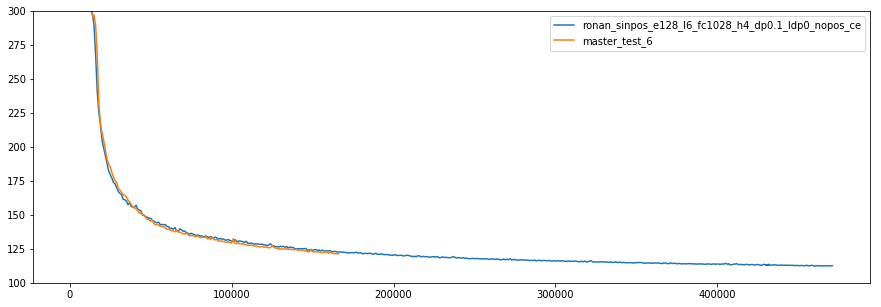

In [185]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

for r in runs:
    log_path = root_dir + r + '/lm.log'
    x = []
    y = []
    with open(log_path) as f:
        for line in f:
            # print(line)
            m = re.search('.*batch=(.+?)/.*', line)
            x.append(int(m.group(1)))
            m = re.search('.*Valid PPL: (.+?)$', line)
            y.append(float(m.group(1)))
    plt.plot(x, y, label=r)
    plt.ylim(100,300)
plt.legend()
